# Turtle Games

# Predicting Future Outcomes


## Advanced Analytics for Organisational Impact

### Scenario
I worked as a data analyst for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points.
- how useful are remuneration and spending scores data.
- can social data (e.g. customer reviews) be used in marketing campaigns.
- what is the impact on sales per product.
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis).
- if there is any possible relationship(s) in sales between North America, Europe, and global sales.

# 1. Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As I am fluent in Python, they asked me to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, I need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. I will use this data set in future analysis as well and it is, therefore, strongly encouraged to first clean the data and then save a copy of the clean data for future use.

## These are the steps I will follow:
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from sklearn import datasets 
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
reviews_na = reviews[reviews.isna().any(axis=1)] 

reviews_na.shape

(0, 11)

There are not missing values in the 'reviews' DataFrame.

In [4]:
# Explore the data.
# Determine the metadata of the 'reviews' DataFrame.
print(reviews.columns)
print(reviews.shape)
print(reviews.dtypes)
reviews.info()

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 

In [5]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [6]:
# Drop unnecessary columns (language and platform).
reviews.drop(reviews.columns[[6, 7]], axis=1, inplace=True)

# View column names.
reviews.shape
list(reviews.columns)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews.rename(columns = {'remuneration (k£)': 'remuneration', 'spending_score (1-100)':'spending_score'}, 
               inplace = True)

# View column names.
list(reviews.columns)

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('/Users/alonsoroblescristina/Desktop/COURSE 3/LSE_DA301_assignment_files/clean_reviews.csv')
reviews.to_csv('clean_reviews.csv', index=False)

In [9]:
# Load the clean_reviews CSV as reviews.
reviews = pd.read_csv('clean_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) Spending score vs Loyalty points

In [10]:
# Independent variable.
x = reviews['spending_score']

Independent variable: what we use to predict or explain the outcome variable. Also called explanatory.
I will use the following independent variables (spending score, age and remuneration) to predict the loyalty points.

In [11]:
# Dependent variable. 
y = reviews['loyalty_points']

Dependent or response variable: what we are interested in understanding or predicting. 
In this case, since we are trying to predict the loyalty points, this will be our dependent variable.

In [12]:
# Determine the correlation between each of the variables of the DataFrame.
reviews.corr()

/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_1157/3020604488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  reviews.corr()


age  remuneration  spending_score  loyalty_points  \
age             1.000000     -0.005708       -0.224334       -0.042445   
remuneration   -0.005708      1.000000        0.005612        0.616065   
spending_score -0.224334      0.005612        1.000000        0.672310   
loyalty_points -0.042445      0.616065        0.672310        1.000000   
product         0.003081      0.305309       -0.001649        0.183600   

                 product  
age             0.003081  
remuneration    0.305309  
spending_score -0.001649  
loyalty_points  0.183600  
product         1.000000

In [13]:
# Determine the correlation between spending score and loyalty points.

# Access these columns as follows.
spending_score = reviews['spending_score']
loyalty_points = reviews['loyalty_points']

# Calculate the correlation coefficient between the two columns.
correlation = spending_score.corr(loyalty_points)

print("Correlation between spending score and loyalty points:", correlation)

Correlation between spending score and loyalty points: 0.6723101119155435


The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation. The closer the correlation coefficient is to -1 or 1, the stronger the correlation. If it is close to 0, there is little to no correlation.

The correlation between the loyalty points and spending score is 67%. This indicates a positive and moderately strong linear relationship between the two variables.

The positive sign of the correlation coefficient indicates that as the spending score increases, the loyalty points tend to increase as well. In other words, there is a direct relationship between spending score and loyalty points. Customers with higher spending scores tend to accumulate more loyalty points.

It's important to note that correlation only measures the strength and direction of the linear relationship. It does not imply causation. A high correlation between spending score and loyalty points does not necessarily mean that one variable causes the other to change.

While the correlation coefficient provides valuable information about the relationship between spending score and loyalty points, it is essential to perform additional analysis and consider other factors. Later, I will calculate the correlation between the loyalty points and the rest of the independent variables (remuneration and age).

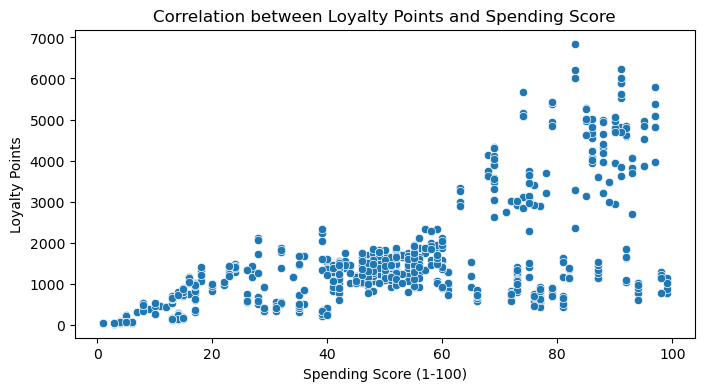

In [14]:
# Starting with a visualisation before running linear regression.

plt.figure(figsize=(8, 4), dpi=100)
plt.title("Correlation between Loyalty Points and Spending Score")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Loyalty Points")
sns.scatterplot(data=reviews,
               x="spending_score",
               y="loyalty_points")

# View the plot.
plt.show()

In [15]:
# Fit the Linear model.
# Polyfit() good to use for simple Linear regression (only one variable to be considered).
# Degree = 1, degree of poLynomium, for SLR always 1.
reg = np.polyfit(reviews['spending_score'], reviews['loyalty_points'], deg = 1)

# View the output.
reg

array([ 33.06169326, -75.05266293])

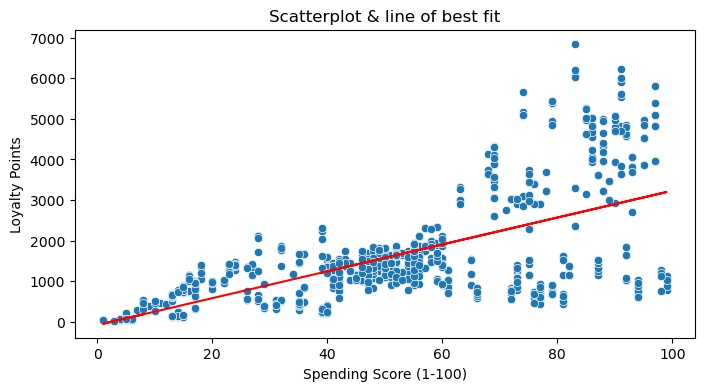

In [16]:
# Add a trendline to visualise the Linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, reviews['spending_score'])

# View the previous scatterplot.
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Scatterplot & line of best fit")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Loyalty Points")

sns.scatterplot (data=reviews,
x='spending_score' , y='loyalty_points')
                 
# Add the trendline.
plt.plot(reviews['spending_score'],
         trend, color='red')
plt.show()

What we can see so far is that the higher the spending score (70 - 100 points) the more loyalty points the customers accumulate, however this does not imply causation between these two variables, since there are customers with high spending scores that do not accumulate many loyalty points, (all those blue dots below the red trend line.

Next, we'll see how good is the fit line.

In [17]:
# Pass linear regression through OLS methods.
test = ols('y ~ x', data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        05:19:51   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Explanation of the results of the OLS model: 

How the Loyalty Points are affected by the Spending Score?

Variables: 

Loyalty Points: y, response variable, dependent variable 

Spending Score: x, explanatory variable, independent variable 

R-squared: How much of the variability of the Y variable (Loyalty points) is explained by the explanatory variable (Spending Score). In this case, aroud 45% of the observed variation can be explained by the model's inputs. In other words, 45% of the variability of the Loyalty Points is explained by the Spending Score. 

Estimate 1: B0, Intercept:  the intercept of the regression line. It is the value where the regression line crosses the y-axis when the independent variable (spending score) is zero. In other words, it is the predicted value of the dependent variable (loyalt points) when the independent variable (spending score) is zero. In this case, when the spending score is zero, we would expect to see -75 loyalty points.

Estimate 2: B1, the slope coefficient of the independent variable (Spending Score). We are mainly interested in the estimate of the slope. We should not judge whether the estimate value is good or bad based just on the absolute value of it. In order to understand whether this is significant in our model, we need to look at the probabilities, (Pr). The smaller the probability is the most important and significant the estimate of that linear regression is. In this case is zero, hence we can say that the spending score is not a very significant estimate of the loyalty points.

The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is not significant. In other words, a t-value of 40.595 suggests that the spending score do not have a strong effect on the loyalty points in this linear regression model.

The coefficient of 'x' describes the slope of the regression line, in other words, how much the response variable 'y' change when 'x' changes by 1 unit. In this case, if the spending score changes by 1 unit, the loyalty points will change by 33.0617 units. 

The last two numbers describe the 95% confidence interval of the true coefficient, i.e. the true slope. For instance, if we take a different sample, the estimated slope will be slightly different. If we take 100 random samples each of 500 observations of spending scores and loyalty points, then 95 out of the 100 samples will derive a slope that is within the interval (31.464 , 34.659).

The "DF residuals" are the differences between the observed values of the dependent variable and the predicted values from the regression equation. They represent the unexplained variability or the errors of the model. The degrees of freedom for the residuals indicate the number of data points that are free to vary after estimating the model. In this case the model estimates that 1998 data points will not vary after estimating the model.

In [18]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [19]:
# Fit the linear regression model.
# x coef: 33.0617.
# Constant coef: -75.0527.
# Create the linear equation.
y_pred = (-75.0527) + 33.0617 * x

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

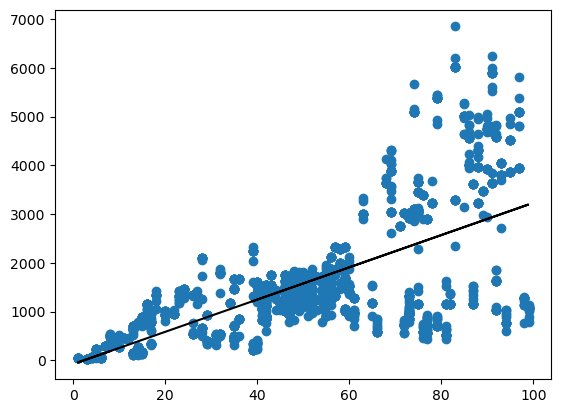

In [20]:
# Plot the data points.
plt.scatter(x, y)

# Plot the regresion line.
plt.plot(x, y_pred, color='black')

In [21]:
# Create the linear regression model.
New_value = 81
y_pred = (-75.0527) +33.0617 * New_value

# View the output
print("If Spendig Score is", New_value, "the predicted Loyalty Points are : ", y_pred)

If Spendig Score is 81 the predicted Loyalty Points are :  2602.945


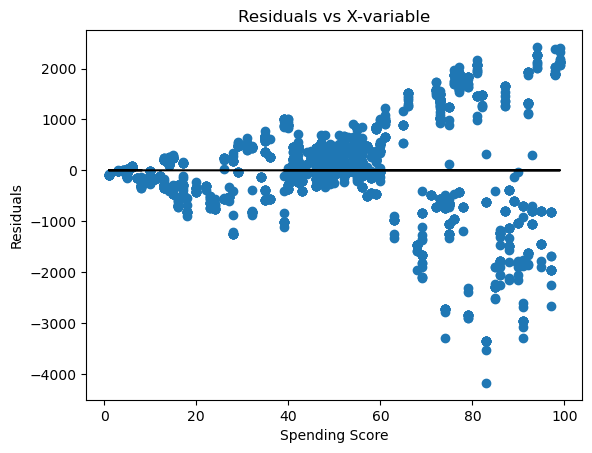

In [23]:
# Plot the residuals= (y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot.

plt.scatter(x, test.predict() - y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable") 
plt.xlabel("Spending Score") 
plt.ylabel("Residuals") 
plt.show()

It's good to see a randomly scattered distribution of the residual variables because it indicates that the linear regression model is showing the underlying relationships between the spending score and the loyalty points effectively. 

A randomly scattered distribution of residuals also indicates the absence of any systematic patterns or trends in the residuals and that the model is providing unbiased estimates of the coefficients.

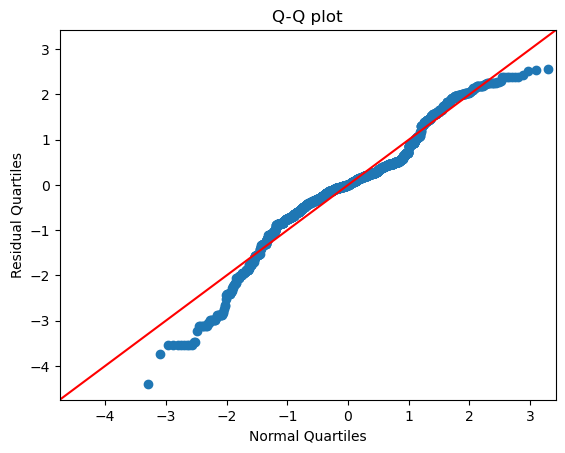

In [24]:
# Import qqplot Library
from statsmodels.graphics.gofplots import qqplot

# Residuals are calcualted
residuals = test.predict() - y

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot (residuals, fit=True, line= '45') 
plt.ylabel("Residual Quartiles") 
plt.xlabel("Normal Quartiles") 
plt.title("Q-Q plot") 
plt.show()

It's also good to see that the residuals variables have a distribution that is very close to normal, since this indicates that the estimated coefficients have smaller standard errors, leading to more precise and reliable estimates, and hypothesis tests are more accurate.

This also means that, on average, the estimated coefficients are equal to the true population coefficients, making the model more accurate in making predictions.

When the residuals are normally distributed, the predictions tend to be more accurate because the model has effectively captured the underlying relationships in the data.

In [25]:
# Finding the best fit line.
# Choose your variables.
x = reviews['spending_score'].values.reshape(-1, 1) 
y = reviews['loyalty_points'].values.reshape(-1, 1)

# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [26]:
# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train, y_train)

# Predict is used for predicting on the x_test.
y_pred = lr.predict(x_test)

# View the output.
y_pred

array([[  48.37264243],
       [2431.12031027],
       [2265.65172222],
       [1305.93391157],
       [1438.308782  ],
       [1769.24595809],
       [ 246.93494809],
       [2331.83915744],
       [1868.52711092],
       [2927.5260744 ],
       [1570.68365244],
       [1537.58993483],
       [1339.02762918],
       [1206.65275874],
       [ 346.21610091],
       [1703.05852287],
       [1107.37160591],
       [ 280.02866569],
       [ 875.71558265],
       [  81.46636004],
       [1471.40249961],
       [ 478.59097135],
       [ 478.59097135],
       [1372.12134678],
       [1769.24595809],
       [1537.58993483],
       [2894.43235679],
       [ 776.43442983],
       [ 180.74751287],
       [2795.15120396],
       [ 941.90301787],
       [ 313.1223833 ],
       [ 246.93494809],
       [1438.308782  ],
       [1603.77737005],
       [1636.87108765],
       [1405.21506439],
       [1736.15224048],
       [1636.87108765],
       [1405.21506439],
       [ 875.71558265],
       [1868.527

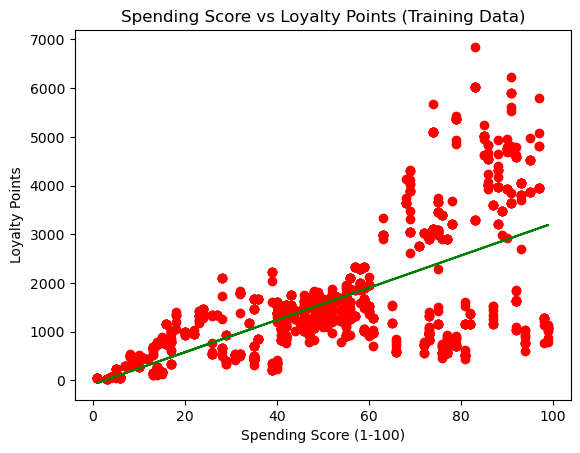

In [27]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Spending Score vs Loyalty Points (Training Data)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Loyalty Points")

plt.show()

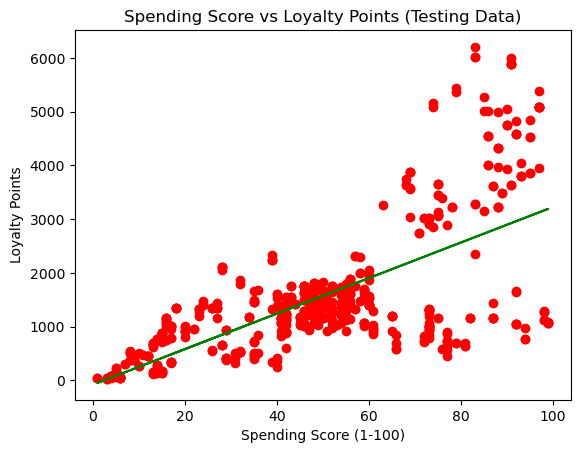

In [28]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Spending Score vs Loyalty Points (Testing Data)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Loyalty Points")

plt.show()

In [29]:
# Print the R-squared, intercept and coefficient values of the Testing Data.
print("R-squared value: ", lr.score(x_test, y_test))
print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

R-squared value:  0.4608058962879792
Intercept value:  [-84.002228]
Coefficient value:  [[33.09371761]]


#### Notes:
- R-squared tells us how much of the variability of Loyalty points is explained by the Spending Score. In this case, around 45% of the observed variation in the Loyalty Points can be explained by the model's inputs. In other words, 46% of the variability of the Loyalty Points is explained by the Spending Score.

- Estimate 1: B0, Intercept: In this case, when the spending score is zero, we would expect to see -84 loyalty points.

- The coefficient of 'x' describes the slope of the regression line, in other words, how much the response variable 'loyalty points' change when the spending score changes by 1 unit. In this case, if the spending score changes by 1 unit, the loyalty points will change by 33 units.  

### 5b) Remuneration vs Loyalty

In [30]:
# Independent variable.
x = reviews['remuneration']

Independent variable: what we use to predict or explain the outcome variable. Also called explanatory.
I am using the following independent variables (spending score, age and remuneration) to predict the loyalty points.

In [31]:
# Dependent variable. 
y = reviews['loyalty_points']

Dependent or response variable: what we are interested in understanding or predicting. In this case, since we are trying to predict the loyalty points, this will be our dependent variable.

In [32]:
# Determine the correlation between spending score and loyalty points.

# Access these columns as follows.
remuneration = reviews['remuneration']
loyalty_points = reviews['loyalty_points']

# Calculate the correlation coefficient between the two columns.
correlation = remuneration.corr(loyalty_points)

print("Correlation between remuneration and loyalty points:", correlation)

Correlation between remuneration and loyalty points: 0.6160647476356388


The correlation between the loyalty points and remuneration is 62%. This indicates a positive and moderately strong linear relationship between the two variables. 

The positive sign of the correlation coefficient indicates that as remuneration increases, the loyalty points tends to increase as well.

It's important to note that correlation only measures the strength and direction of the linear relationship. It does not imply causation. A high correlation between remuneration and loyalty points does not necessarily mean that one variable causes the other to change.

While the correlation coefficient provides valuable information about the relationship between remuneration and loyalty points, it is essential to perform additional analysis and consider other factors. Later, I will calculate the correlation between the loyalty points and the rest of the independent variables in the DataFrame (age).

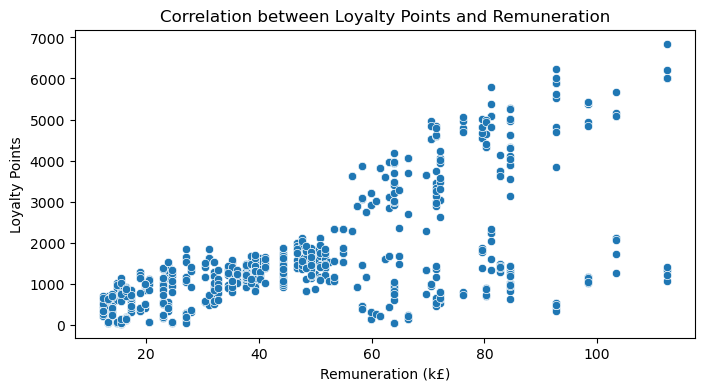

In [33]:
# Starting with a visualisation BEFORE running linear regression.

plt.figure(figsize=(8, 4), dpi=100)
plt.title("Correlation between Loyalty Points and Remuneration")
plt.xlabel("Remuneration (k£)")
plt.ylabel("Loyalty Points")
sns.scatterplot(data=reviews,
               x="remuneration",
               y="loyalty_points")

#Set axis values.
#plt.ylim(13,17)
#plt.xlim(15,55)
plt.show()

In [34]:
# Fit the Linear model.
# Polyfit() good to use for simple Linear regression (only one variable).
# Degree = 1, degree of poLynomium, for SLR always 1.
reg = np.polyfit(reviews['remuneration'], reviews['loyalty_points'], deg = 1)

# View output.
reg

array([ 34.18782549, -65.6865128 ])

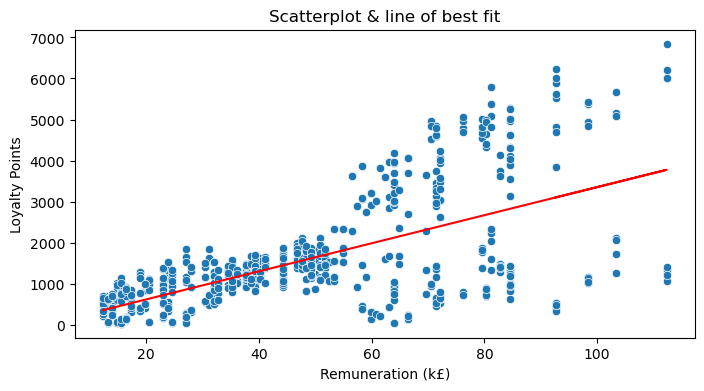

In [35]:
# Add a trendline to visualise the Linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, reviews['remuneration'])

# View the previous scatterplot.
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Scatterplot & line of best fit")
plt.xlabel("Remuneration (k£)")
plt.ylabel("Loyalty Points")

sns.scatterplot (data=reviews,
x='remuneration' , y='loyalty_points')
                 
# Set axis values.
#plt.ylim(13, 17) 
#plt.xlim(15, 55)
                 
# Add the trendline.
plt.plot(reviews['remuneration'],
         trend, color='red')
plt.show()

What we can see so far is that the loyalty points tend to increase when the remuneration is higher (85K - 100K+), however this does not indicate causation between these two variables, since there are customers with hight remunerations who do not accumulate many loyalty points.

Next, we'll see how good is the fit line.

In [36]:
# Pass linear regression through OLS methods.
test = ols('y ~ x', data = reviews). fit()
# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        05:25:18   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Explanation of the results of the model: 

How the Loyalty Points are affected by the Remuneration?

R-squared: in this case, around 38% of the total variability of the Loyalty Points is explained by the Remuneration. 

Estimate 1: B0, Intercept: in this case, when the remuneration is zero, we would expect to see -66 loyalty points.

Estimate 2: B1, the slope coefficient of the independent variable (remuneration). We are mainly interested in the estimate of the slope. In order to understand whether this is significant in our model, we need to look at the probabilities, (Pr). The smaller the probability is the most important and significant the estimate of that linear regression is. In this case is zero, hence we can say that remuneration is not a very significant estimate of the loyalty points.

The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is not significant. In other words, a t-value of 34.960 suggests that the remuneration do not have a strong effect on the loyalty points in this linear regression model.

The coefficient of 'x' describes the slope of the regression line, in other words, how much the response variable (loyalty points) change when the remuneration changes by 1 unit. In this case, if the customer remuneration changes by 1 unit (k£) the loyalty points will change by 34.1878 units. 

The last two numbers describe the 95% confidence interval of the true coefficient, i.e. the true slope. For instance, if we take a different sample, the estimated slope will be slightly different. If we take 100 random samples each of 500 observations of remunerations and loyalty points, then 95 out of the 100 samples will derive a slope that is within the interval (32.270 , 36.106).

The "DF residuals": in this case the model estimates that 1998 data points will not vary after estimating the model.

In [37]:
#Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [38]:
# x coef: 34.1878.
# Constant coef: -65.6865
# Create the linear equation.
y_pred = (-65.6865) + 34.1878 * x

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

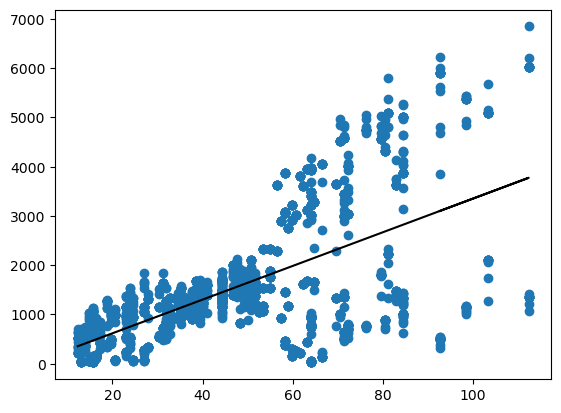

In [39]:
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_pred, color='black')

In [40]:
# Create the linear regression model.
New_value = 60
y_pred = (-65.6865) +34.1878 * New_value

# View the output
print("If Remuneration is", New_value, "the predicted Loyalty Points are : ", y_pred)

If Remuneration is 60 the predicted Loyalty Points are :  1985.5815


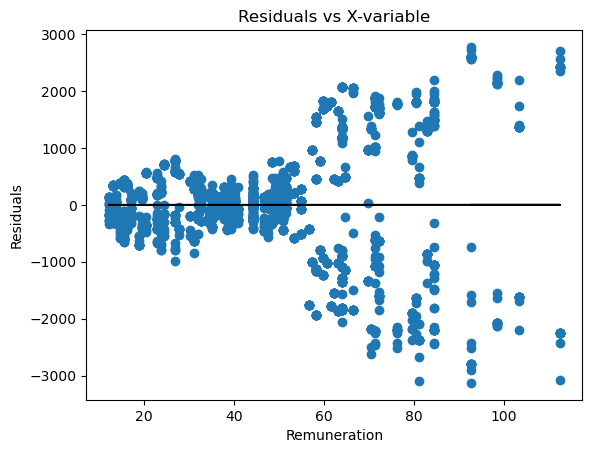

In [41]:
# Plot the residuals= (y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x, test.predict() - y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable") 
plt.xlabel("Remuneration") 
plt.ylabel("Residuals") 
plt.show()

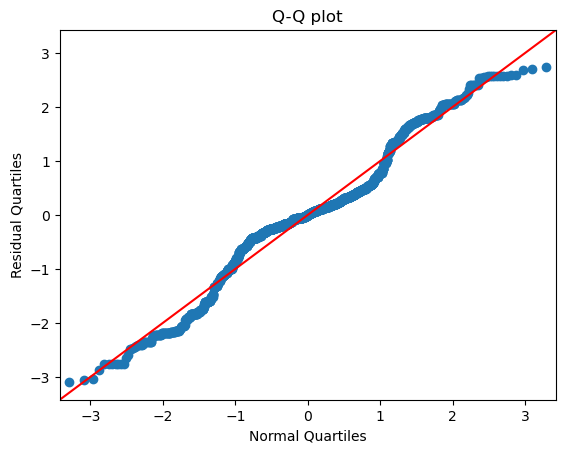

In [42]:
# Import qqplot Library
from statsmodels.graphics.gofplots import qqplot

# Residuals are calcualted
residuals = test.predict() - y

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot (residuals, fit=True, line= '45') 
plt.ylabel("Residual Quartiles") 
plt.xlabel("Normal Quartiles") 
plt.title("Q-Q plot") 
plt.show()

It's good to see a randomly scattered distribution of the residual variables because it indicates that the linear regression model is showing the underlying relationships between the remuneration and the loyalty points effectively. 

A randomly scattered distribution of residuals also indicates the absence of any systematic patterns or trends in the residuals and that the model is providing unbiased estimates of the coefficients.

It's also good to see that the residuals variables have a distribution that is very close to normal, since this indicates that the estimated coefficients have smaller standard errors, leading to more precise and reliable estimates, and hypothesis tests are more accurate.

This also means that, on average, the estimated coefficients are equal to the true population coefficients, making the model more accurate in making predictions.

When the residuals are normally distributed, the predictions tend to be more accurate because the model has effectively captured the underlying relationships in the data.

In [43]:
# Finding the best fit line.
# Choose your variables.
x = reviews['remuneration'].values.reshape(-1, 1) 
y = reviews['loyalty_points'].values.reshape(-1, 1)

# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [44]:
# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train, y_train)

# Predict is used for predicting on the x_test.
y_pred = lr.predict(x_test)

# View the output.
y_pred

array([[ 766.88300807],
       [2162.26946673],
       [1987.8461594 ],
       [1697.14064718],
       [1580.85844229],
       [1348.29403251],
       [2045.98726184],
       [ 592.45970074],
       [1290.15293007],
       [1900.63450573],
       [1173.87072518],
       [1638.99954473],
       [1842.49340329],
       [2772.75104239],
       [2452.97497895],
       [1464.5762374 ],
       [2133.19891551],
       [1958.77560818],
       [ 563.38914952],
       [ 621.53025196],
       [1464.5762374 ],
       [ 883.16521296],
       [2889.03324728],
       [1464.5762374 ],
       [1232.01182762],
       [1668.07009595],
       [2598.32773506],
       [2365.76332528],
       [3179.7387595 ],
       [ 737.81245685],
       [ 737.81245685],
       [2133.19891551],
       [2423.90442773],
       [1726.2111984 ],
       [1464.5762374 ],
       [1115.72962274],
       [1144.80017396],
       [1609.92899351],
       [1464.5762374 ],
       [1144.80017396],
       [1929.70505695],
       [1290.152

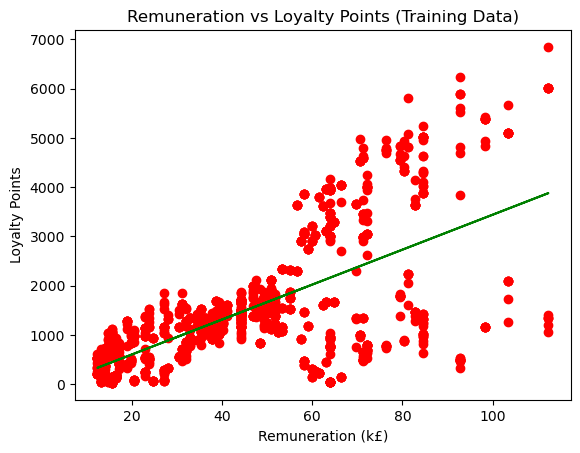

In [45]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Remuneration vs Loyalty Points (Training Data)")
plt.xlabel("Remuneration (k£)")
plt.ylabel("Loyalty Points")

plt.show()

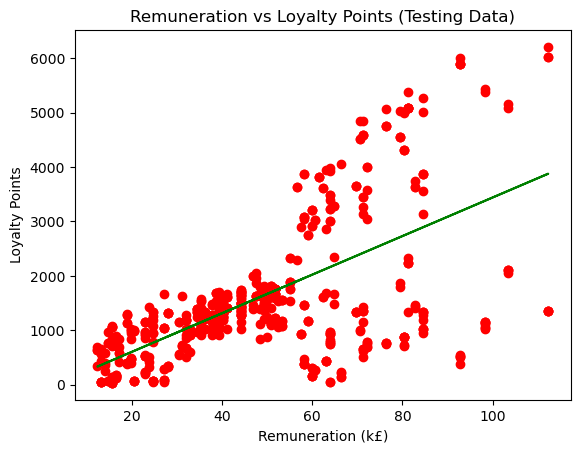

In [46]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Remuneration vs Loyalty Points (Testing Data)")
plt.xlabel("Remuneration (k£)")
plt.ylabel("Loyalty Points")

plt.show()

In [47]:
# Print the R-squared, intercept and coefficient values of the Testing Data.
print("R-squared value: ", lr.score(x_test, y_test))
print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

R-squared value:  0.32173930708296905
Intercept value:  [-105.23352859]
Coefficient value:  [[35.45189173]]


#### Notes:

- R-squared tells us how much of the variability of Loyalty points is explained by the Remuneration. In this case, around 32% of the observed variation in the Loyalty Points can be explained by the model's inputs. In other words, 32% of the variability of the Loyalty Points is explained by the Remuneration.

- Estimate 1: B0, Intercept: In this case, when the remuneration is zero, we would expect to see -105 loyalty points.

- The coefficient of 'x' describes the slope of the regression line, in other words, how much the response variable 'loyalty points' change when the remuneration changes by 1 unit. In this case, if the remuneration changes by 1 unit (1k£), the loyalty points will change by 35.45 units. 

### 5c) Age vs Loyalty points

In [48]:
# Independent variable.
x = reviews['age']

Independent variable: what we use to predict or explain the outcome variable. Also called explanatory variable.
I am using the following independent variables (spending score, age and remuneration) to predict the loyalty points.

In [49]:
# Dependent variable. 
y = reviews['loyalty_points']

Dependent or response variable: what we are interested in understanding or predicting. In this case, since we are trying to predict the loyalty points, this will be our dependent variable.

In [50]:
# Determine the correlation between age and loyalty points.

# Access these columns as follows.
age = reviews['age']
loyalty_points = reviews['loyalty_points']

# Calculate the correlation coefficient between the two columns.
correlation = age.corr(loyalty_points)

print("Correlation between age and loyalty points:", correlation)

Correlation between age and loyalty points: -0.04244464682054187


The correlation between the loyalty points and age is -4.2%. This indicates that there is a weak negative linear relationship between age and loyalty points. As age increases, loyalty points tend to slightly decrease, and vice versa. However, since the correlation is close to zero, this linear relationship is very weak, and the points may be scattered around without following a clear pattern.

It's important to note that a weak correlation does not imply causation. The correlation coefficient only measures the strength and direction of the linear relationship between age and loyalty points. It does not imply that age is the cause of changes in loyalty points or vice versa.

The weak correlation may indicate that age alone is not a strong predictor of loyalty points. There may be other factors or interactions with age that better explain variations in loyalty points.

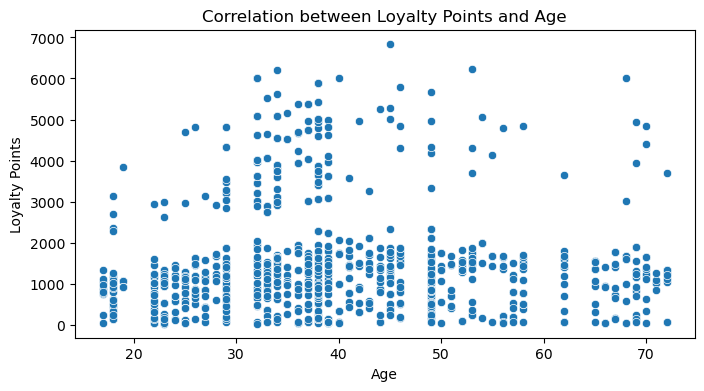

In [51]:
# Starting with a visualisation BEFORE running linear regression.

plt.figure(figsize=(8, 4), dpi=100)
plt.title("Correlation between Loyalty Points and Age")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")
sns.scatterplot(data=reviews,
               x="age",
               y="loyalty_points")

plt.show()

In [52]:
# Fit the Linear model.
# Polyfit() good to use for simple Linear regression (only one variable).
# Degree = 1, degree of poLynomium, for SLR always 1.
reg = np.polyfit(reviews['age'], reviews['loyalty_points'], deg = 1)

# View output.
reg

array([  -4.01280515, 1736.5177394 ])

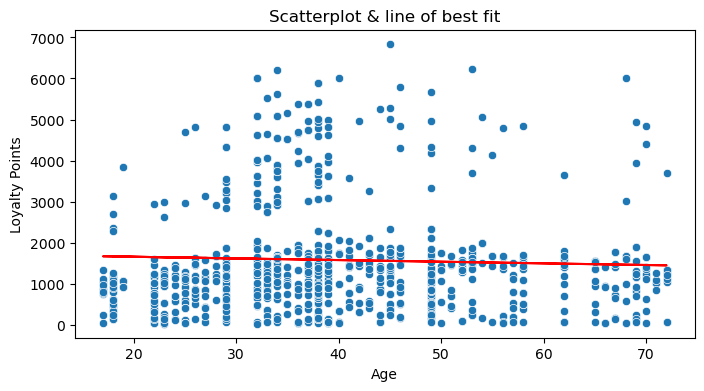

In [53]:
# Add a trendline to visualise the Linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, reviews['age'])

# View the previous scatterplot.
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Scatterplot & line of best fit")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

sns.scatterplot (data=reviews,
x='age' , y='loyalty_points')
                 
# Set axis values.
#plt.ylim(13, 17) 
#plt.xlim(15, 55)
                 
# Add the trendline.
plt.plot(reviews['age'],
         trend, color='red')
plt.show()

What we can see so far is that there is no a clear pattern or linear relationship between age and loyalty points. 

The correlation between the loyalty points and age shown beore (-4.2%), indicates that there is a weak negative linear relationship between age and loyalty points, that is difficult to appreciate. As age increases, loyalty points tend to slightly decrease, and vice versa. However, since the correlation is negative, this linear relationship is very weak, and this why we see the points scattered around without following a clear pattern. 

Next, we'll see how good is the fit line.

In [54]:
# Pass linear regression through OLS methods.
test = ols('y ~ x', data = reviews). fit()
# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Jul 2023   Prob (F-statistic):             0.0577
Time:                        05:26:50   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Explanation of the results of the model: 

How the Loyalty Points are affected by the Age of the customers?

R-squared: in this case, around 0.2% of the variability of the Loyalty Points is explained by the Age. 

Estimate 1: B0, Intercept: in this case, when the age is zero, we would expect to see 1736 loyalty points. This does not make sense, at it does not make sense either for all these independent values (age, remuneration and spending score)to be zero for a specific customer.

Estimate 2: B1, the slope coefficient of the independent variable (age). We are mainly interested in the estimate of the slope. In order to understand whether this is significant in our model, we need to look at the probabilities, (Pr). The smaller the probability is the most important and significant the estimate of that linear regression is. In this case is 0.058, hence we can say that age is not a significant estimate of the loyalty points.

The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0.058, thus the estimated slope is not significant. In other words, a t-value of -1.899 suggests that the age do not have effect on the loyalty points in this linear regression model.

The coefficient of 'x' describes the slope of the regression line, in other words, how much the response variable (loyalty points) change when the age changes by 1. In this case, if the customer's age changes by 1 year, the loyalty points will change by -4.0128 units. 

The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if we take a different sample, the estimated slope will be slightly different. If we take 100 random samples each of 500 observations of ages and loyalty points, then 95 out of the 100 samples will derive a slope that is within the interval (-8.157 , 0.131).

The "DF residuals": the degrees of freedom for the residuals indicate the number of data points that are free to vary after estimating the model. In this case the model estimates that 1998 data points will not vary after estimating the model.

In [55]:
#Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [56]:
# x coef: -4.0128.
# Constant coef: 1736.5177.
# Create the linear equation.
y_pred =(1736.5177) -4.0128 * x

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

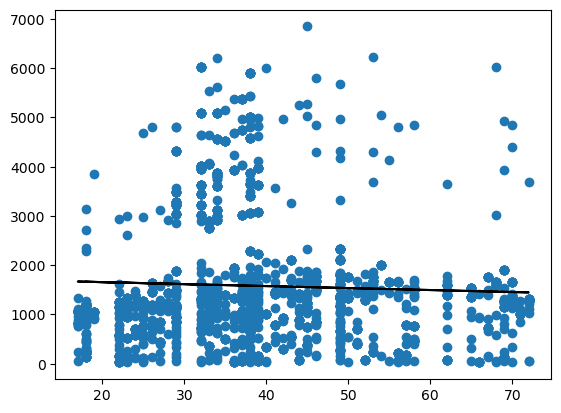

In [57]:
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_pred, color='black')

In [58]:
# Create the linear regression model.
New_value = 30
y_pred = (1736.5177) -4.0128 * New_value

# View the output
print("If Age is", New_value, "the predicted Loyalty Points are : ", y_pred)

If Age is 30 the predicted Loyalty Points are :  1616.1337


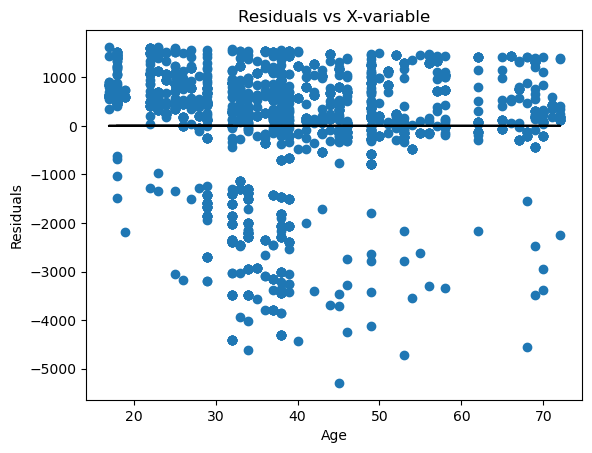

In [59]:
# Plot the residuals= (y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x, test.predict() - y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable") 
plt.xlabel("Age") 
plt.ylabel("Residuals") 
plt.show()

A randomly scattered distribution of the residuals is desirable because it indicates that the linear regression model is showing the underlying relationships between the predictor variable (age) and the dependent variable (loyalty points) effectively. 

A randomly scattered distribution of residuals also indicates the absence of any systematic patterns or trends in the residuals and that the model is providing unbiased estimates of the coefficients.

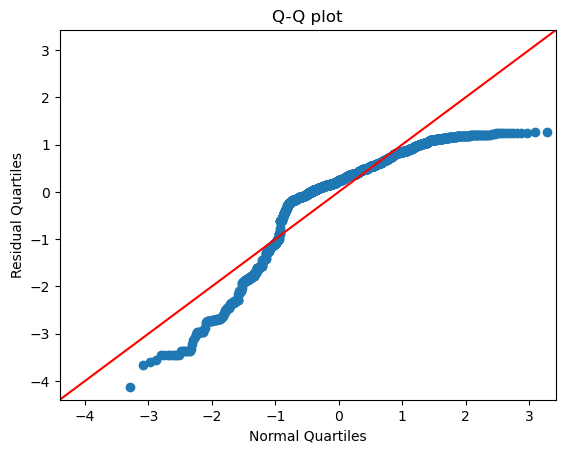

In [60]:
# Import qqplot Library
from statsmodels.graphics.gofplots import qqplot

# Residuals are calcualted.
residuals = test.predict() - y

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot (residuals, fit=True, line= '45') 
plt.ylabel("Residual Quartiles") 
plt.xlabel("Normal Quartiles") 
plt.title("Q-Q plot") 
plt.show()

It's also good to see that the residuals variables have a distribution that is somehow close to normal, since the predictions tend to be more accurate because the model has effectively captured the underlying relationships in the data.

In [61]:
# Finding the best fit line.
# Choose your variables.
x = reviews['age'].values.reshape(-1, 1) 
y = reviews['loyalty_points'].values.reshape(-1, 1)

# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [62]:
# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train, y_train)

# Predict is used for predicting on the x_test.
y_pred = lr.predict(x_test)

# View the output.
y_pred

array([[1465.83351109],
       [1590.78902174],
       [1609.16483213],
       [1645.91645291],
       [1550.36223888],
       [1502.58513187],
       [1664.2922633 ],
       [1587.11385966],
       [1660.61710122],
       [1587.11385966],
       [1546.68707681],
       [1561.38772512],
       [1546.68707681],
       [1587.11385966],
       [1543.01191473],
       [1627.54064252],
       [1561.38772512],
       [1517.28578018],
       [1550.36223888],
       [1609.16483213],
       [1517.28578018],
       [1491.55964564],
       [1605.48967005],
       [1568.73804927],
       [1590.78902174],
       [1649.59161499],
       [1594.46418382],
       [1550.36223888],
       [1601.81450797],
       [1638.56612875],
       [1590.78902174],
       [1631.2158046 ],
       [1590.78902174],
       [1535.66159057],
       [1524.63610434],
       [1550.36223888],
       [1612.83999421],
       [1473.18383525],
       [1638.56612875],
       [1550.36223888],
       [1638.56612875],
       [1590.789

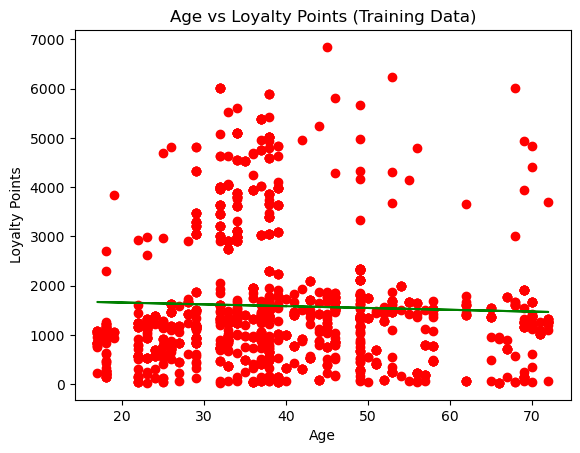

In [63]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Age vs Loyalty Points (Training Data)")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.show()

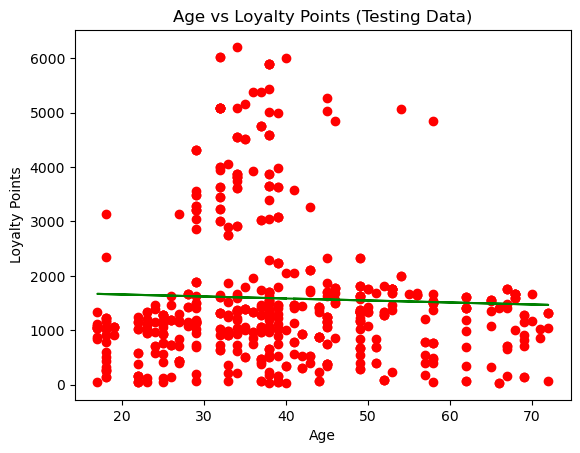

In [64]:
# Plot graph with regression line.
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Age vs Loyalty Points (Testing Data)")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.show()

In [65]:
# Print the R-squared, intercept and coefficient values of the Testing Data.
print("R-squared value: ", lr.score(x_test, y_test))
print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

R-squared value:  0.002088348289358777
Intercept value:  [1730.4451807]
Coefficient value:  [[-3.67516208]]


## 6. Observations and insights

- R-squared: in this case, around 0.2% of the observed variation in the Loyalty Points can be explained by the model's inputs. In other words, 0.2% of the variability of the Loyalty Points is explained by the customer's age.

- Estimate 1: B0, Intercept: In this case, when the age is zero, we would expect to see 1730 loyalty points. This does not make sense at all, at it does not make sense either for all these independent values (age, remuneration and spending score)to be zero for a specific customer.

- The coefficient of 'x': in this case, if the age increases by 1 year, the loyalty points will decrease by 3.67 units. 

# 

# 2. Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. I have been tasked to identify groups within the customer base that can be used to target specific market segments. I will use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## These are the steps I will follow:
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('clean_reviews.csv')

# View the DataFrame.
df2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [4]:
# Drop unnecessary columns.
df2.drop(df2.columns[[0, 1, 4, 5, 6, 7, 8]], axis=1, inplace=True)

# View DataFrame.
df2.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [5]:
# Explore the data.
# Any missing values?
df2_na = df2[df2.isna().any(axis=1)] 
df2_na.shape

(0, 2)

In [6]:
# Any null values?
df2.isnull().sum()

remuneration      0
spending_score    0
dtype: int64

In [7]:
# Explore the data.
# Determine the metadata of the 'reviews' DataFrame.
print(df2.columns)
print(df2.shape)
print(df2.dtypes)
df2.info()

Index(['remuneration', 'spending_score'], dtype='object')
(2000, 2)
remuneration      float64
spending_score      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [8]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<Axes: title={'center': 'Correlation between Spending Score and Remuneration'}, xlabel='Remuneration (k£)', ylabel='Spending Score (1-100)'>

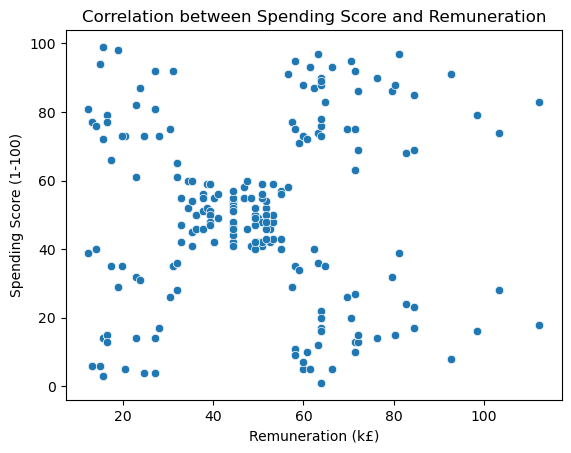

In [9]:
# Create a scatterplot with Seaborn.
plt.title("Correlation between Spending Score and Remuneration")
plt.xlabel("Remuneration (k£)")
plt.ylabel("Spending Score (1-100)")
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2)

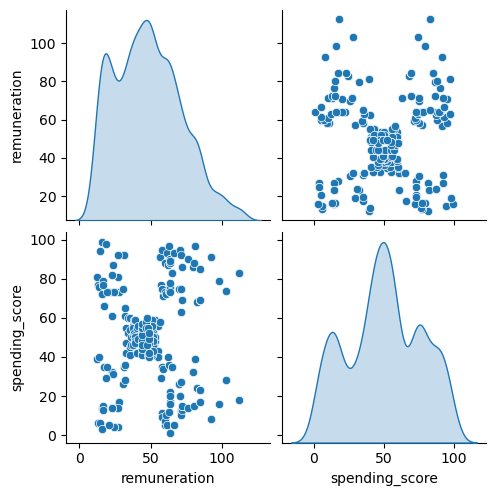

In [10]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde') 

What we can see so far is that there are five clusters. Out of these five, there is one in the middle that seems to be the most prominent. Next, I'll employ the K-means clustering to determine the number of clusters using two methods: elbow and silhoutte methods.

## 3. Elbow and silhoutte methods

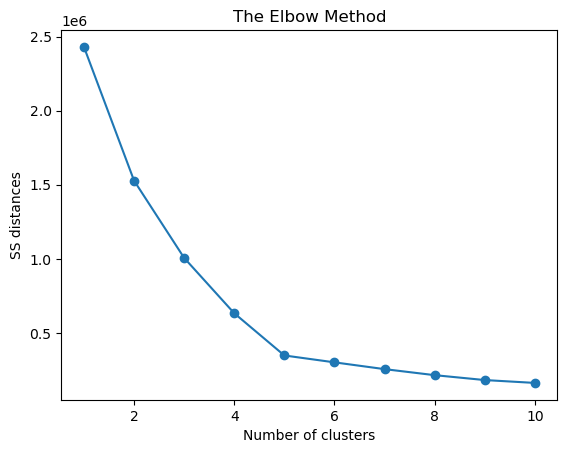

In [11]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distances")
plt.show()

Based on the Elbow method, five clusers have been identified. Next, I'll apply the Silhouette method.

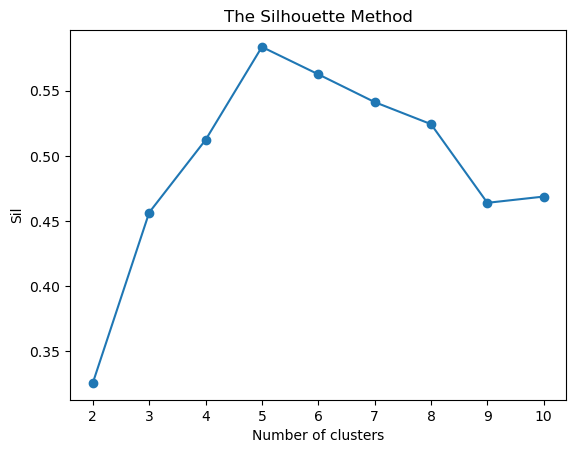

In [12]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Based on the Silhouette method, five main clusters have been identified, meaning that the 5 cluster solution has the highest average silhouette coefficient. Based on our data set, we will have to judge what number of clusters is the most appropriate to consider. 

At the moment, we are only comparing and plotting two variables (remuneration and spending score), however if we wanted to introduce more variables (attributes) from our data set, let's say for instance, we wanted to introduce the gender of the customers, we would be able to exrtact more insights. For now, I'll keep looking at these two variables, and I'll evaluate later in my analysis, wheter or not it's worth introducing the gender variable as the hue of these plots.

Based on the number of clusters suggested by the elbow and silhouette methods calculated earlier, I'll use 5 clusters first, since this number seems to be the most appropriate, and I will test the k means clustering with three and seven clusters to identify the behaviour of the data when using different number of clusters and see how they compare.

## 4. Evaluate k-means model at different values of *k*

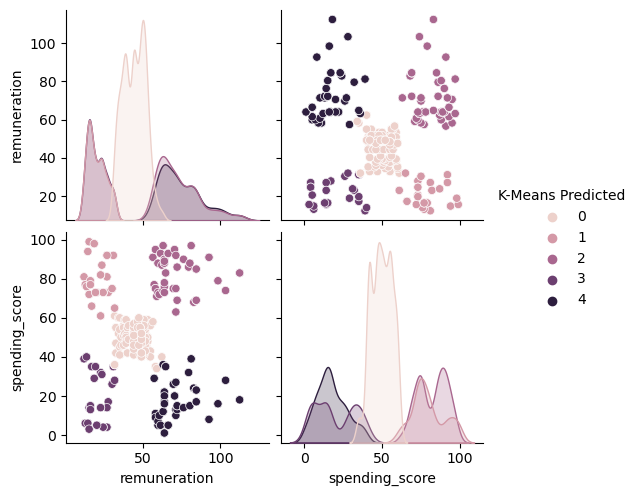

In [13]:
# Use five clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

If we were to use five colusters solution, based on the classification on those 2000 observations to one of these five clusters solution, what the distribution of the remuneration and the spendig score are for these 5 distinct clusters.

If we look at the remuneration alone or the spending score alone, it is hard to identify these five clusters, however when we look at the remuneration and the spending score together, we can easily identify the five clusters with a different colour. What this is telling us is that if we wanted to target different customer segments within our data base, it might be a bit more difficult to identify those segments if we were to look at the remuneration only or the spending score only.

In this case, it might be better to consider these two variables together to identify different customer's segments to target in our marketing campaigns.

Cluster 0: customers with a remuneration between (£35K - (£55K) and a spending score between 35 - 60 points)
Cluster 1: customers with a remuneration between (£15K - (£35K) and a spending score between 60 - 100 points)
Cluster 2: customers with a remuneration between (£55K - (£100K+) and a spending score between 60 - 100 points)
Cluster 3: customers with a remuneration between (£15K - (£35K) and a spending score between 5 - 40 points)
Cluster 4: customers with a remuneration between (£55K - (£100K+) and a spending score between 5 - 40 points)

Based on the remuneration ranges and the spending score ranges for each of the clusters (customer segments), we can say that the spending score and the remuneration are widely distributed across the entire sample, meaning that neither the remuneration nor the spendig score are clear indicatives of the other, in other words none of these variables are causative of the other, so for us to better undertand and identify each of the segments, we have to consider these two variables togeter. 

As mentioned earlier, in future analysis, it might be interesting to look at other variables along with these two, such as the customer gender, age and education. We would introduce these additional variables as the hue of these plots.

In [14]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

By looking at the number of observations by cluster, we can see that cluster zero has the highest number of observations (774). If we add up the number of obserevations of each of these five clusters, we get the total number of obseervations in our original reviews data set. This tells us that this number of clusters is accurately considering the correct number of observations in our data set and there is no misclassification. 

In [15]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


<Axes: xlabel='remuneration', ylabel='spending_score'>

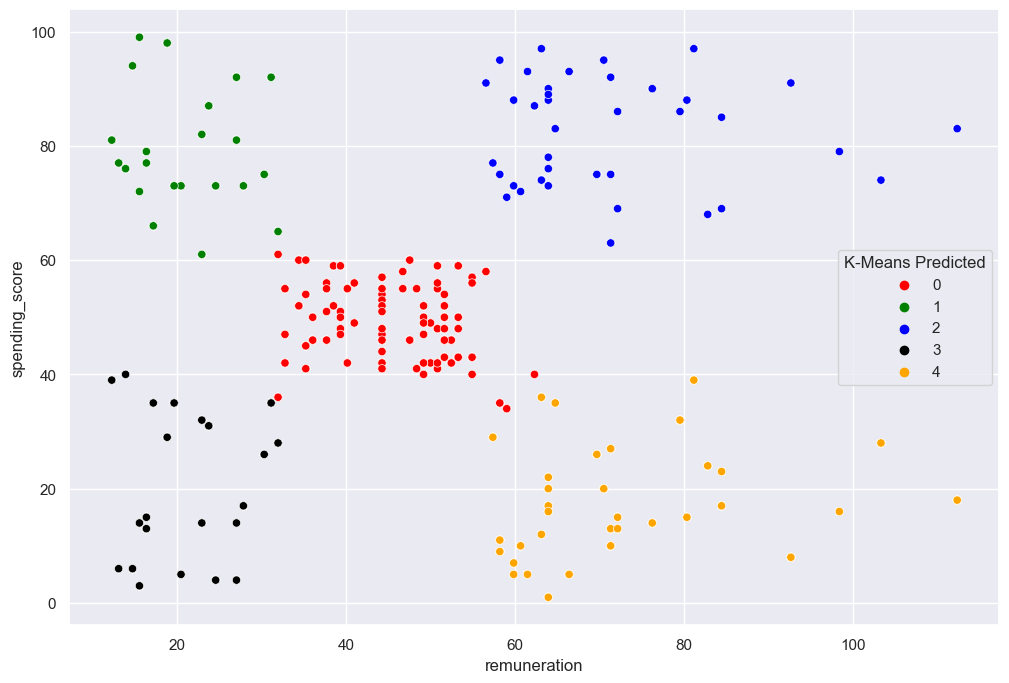

In [16]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

Next, I will use seven clusters.

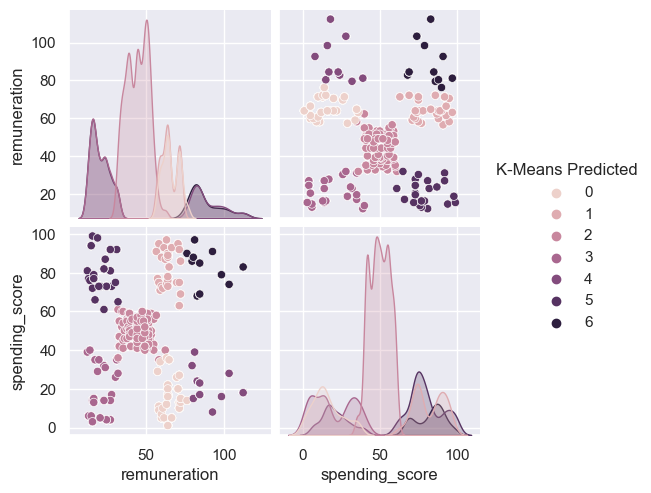

In [17]:
# Use 7 clusters:
kmeans = KMeans(n_clusters = 7,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [18]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    767
3    271
5    269
1    227
0    214
6    129
4    123
Name: K-Means Predicted, dtype: int64

By looking at the number of observations by cluster, we can see that cluster two has the highest number of observations (767). If we add up the number of obserevations of each of these seven clusters, we get the total number of obseervations in our original reviews data set. This tells us that this number of clusters is accurately considering the correct number of observations in our data set too and there is no misclassification. 

We can also see that, cluster six and cluster four are the clusters with the lowest number of observations.

Considering that Turtle Games is looking to identify groups within the customer base that can be used to target specific market segments for their marketing campaigns, our job is to identify the optimal number of clusters for this purpose.

Looking for instane at those customers within cluster four, with a remuneration between 75K - 100K+, they behave very similar to those customers within cluster zero, with a remuneration between 50K - 75K, inthe sense that these two clusters share the same spending score being within the same range (5 - 40 points). 

The same happens when we look at cluster six, and cluster one, even thought we can also identify two groups of customers within thse two clusters in terms of their remuneration, (cluster six being the customers with the higher remunertation between 75K - 100K, and cluster one with customers with a reunerration between 50K - 75K, both of these clusters share a similar spending score (60 - 100 points).

This is telling us that it might be worth grouping clusters six and one together as they were grouped when looking only five clusters, and grouping clusters four and zero together.

In [19]:
# View the K-Means predicted.
print(x)

      remuneration  spending_score  K-Means Predicted
0            12.30              39                  3
1            12.30              81                  5
2            13.12               6                  3
3            13.12              77                  5
4            13.94              40                  3
...            ...             ...                ...
1995         84.46              69                  6
1996         92.66               8                  4
1997         92.66              91                  6
1998         98.40              16                  4
1999         92.66               8                  4

[2000 rows x 3 columns]


<Axes: xlabel='remuneration', ylabel='spending_score'>

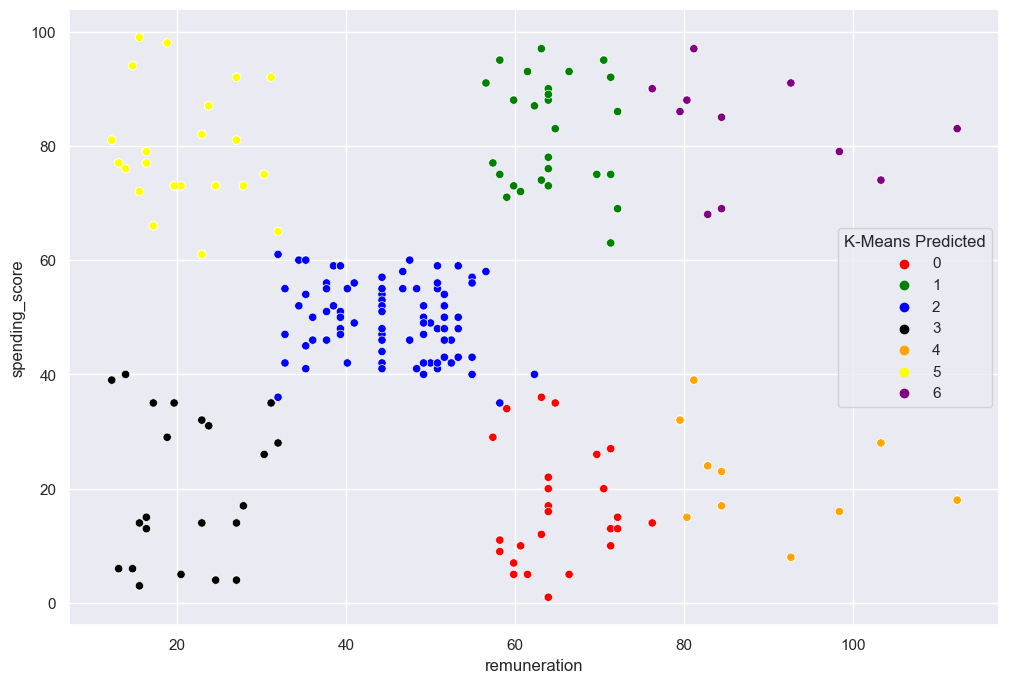

In [20]:
# Visualising the seven clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'yellow', 'purple'])

Next, I will use 3 clusters.

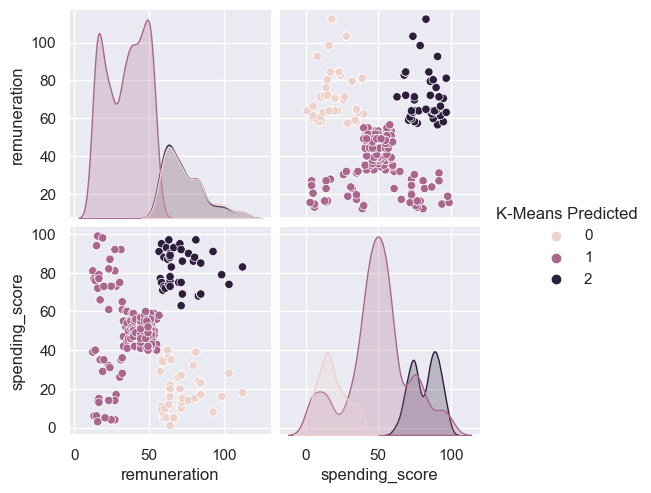

In [21]:
# Use three clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [22]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

By looking at the number of observations by cluster, we can see that cluster one has the highest number of observations (1293). If we add up the number of obserevations of each of these three clusters, we get the total number of obseervations in our original reviews data set. This tells us that this number of clusters is accurately considering the correct number of observations in our data set too and there is no misclassification. 

In [23]:
# View the K-Means predicted.
print(x)

      remuneration  spending_score  K-Means Predicted
0            12.30              39                  1
1            12.30              81                  1
2            13.12               6                  1
3            13.12              77                  1
4            13.94              40                  1
...            ...             ...                ...
1995         84.46              69                  2
1996         92.66               8                  0
1997         92.66              91                  2
1998         98.40              16                  0
1999         92.66               8                  0

[2000 rows x 3 columns]


<Axes: xlabel='remuneration', ylabel='spending_score'>

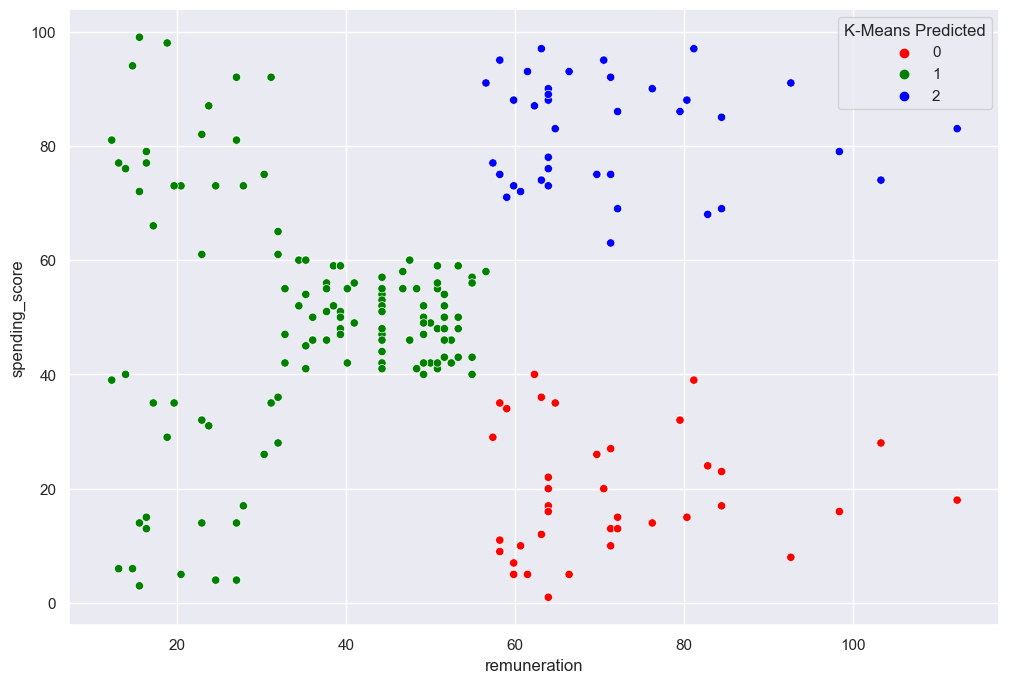

In [24]:
# Visualising the three clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])

## 5. Fit final model and justify your choice

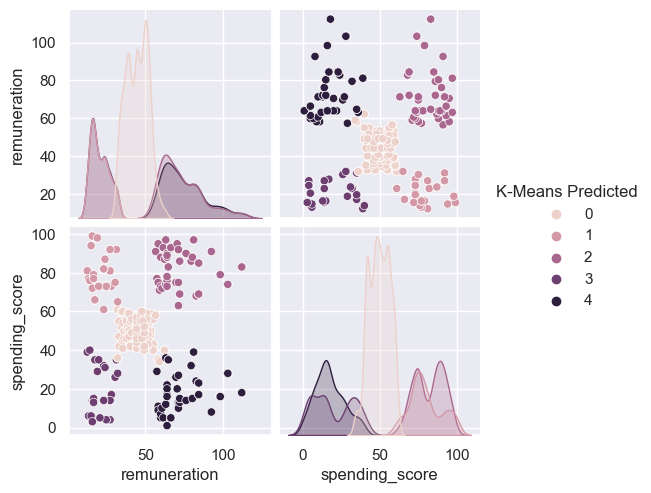

In [25]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [26]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

      remuneration  spending_score  K-Means Predicted
0            12.30              39                  3
1            12.30              81                  1
2            13.12               6                  3
3            13.12              77                  1
4            13.94              40                  3
...            ...             ...                ...
1995         84.46              69                  2
1996         92.66               8                  4
1997         92.66              91                  2
1998         98.40              16                  4
1999         92.66               8                  4

[2000 rows x 3 columns]


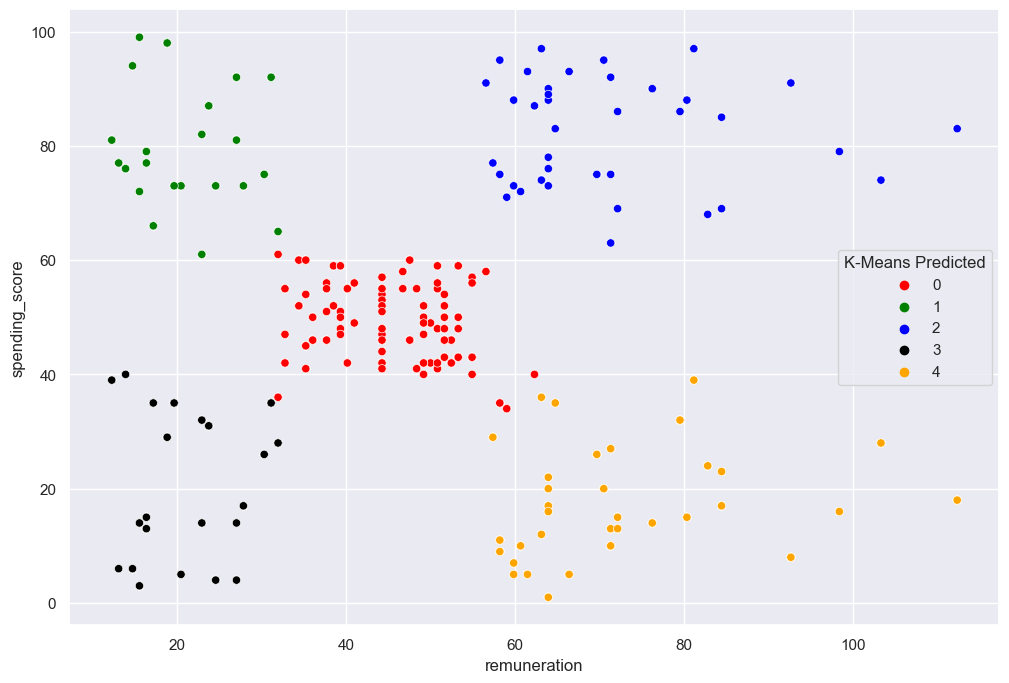

In [27]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
# View the K-Means predicted.
print(x)

## 7. Insights and observations


The number of predicted values per class seems to indicate a better distribution for k=5 than k=7 and k=3, hence I selected five clusters as the optimal number of clusters based on all the analysis and insights mentioned above.

We can clearly see that there is a distinct demarcation in terms of remuneration and spending scores, however this is not an indication of the other variable, menaing that there's not a causative relationship between these two variables.

Clusters two and four are the groups with the highest reunertation, however this is not an indication of a high spending score. 

And clusters three and one are the customers with the lowest remuneration, but again this is not an indication of a lower spending sore. 

The fifth group is cluster zero, which might be the easier segment to taget for Turtle Games, since this group of customers seems to behave more homogenously and isolated in terms of all of the obserbations within our data set grouping customers with a remuneration between (£35K - (£55K) approx. and a spending score between 35 - 60 points), with no other clusters showing this combination of reemuneration and spendig score, unlike the rest of the clusters that share some similarities of behaviour in terms of sharing either the same remuneration level with another cluster or sharing the same spending score with another cluster.

So, my proposal of segments for Turtle Games to target in their marketing campaigns would be as follow:

Segment 1: customers with a remuneration between (£35K - (£55K) and a spending score between 35 - 60 points)
Segment 2: customers with a remuneration between (£15K - (£35K) and a spending score between 60 - 100 points)
Segment 3: customers with a remuneration between (£55K - (£100K+) and a spending score between 60 - 100 points)
Segment 4: customers with a remuneration between (£15K - (£35K) and a spending score between 5 - 40 points)
Segment 5: customers with a remuneration between (£55K - (£100K+) and a spending score between 5 - 40 points)

By grouping Turtle Games within the above segments, we could say that the spending score is an indication of the number of purchases or the amount of money spent by customers during a specific range of time, indicating that regardless of the customer remuneration, there customers with a low remuneration that tend to have a high spending score (we can assume that this is because they spend more), these customers belong to segment 2, and then to give another example of how customers behave, we can see that for instance, customers within segment 5, with a high remuneration above 60K, tend to have a lower spendig score, below 40 points (we can assume that this is because they spend less).

In future analysis, it might be worth looking at the behaviour of these segments by considering a specifc period of time, let's say one year, one month, or even quartley, so we can then compare the customers behaviour across different years, months or quarters.

It might also be interesting for future analysis, to introduce a third variable into our clustering analysis, such as the customer age, gender or education, based on the current data base that Turtle Games has.

# 

# 3. NLP using Python
Customer reviews were downloaded from the website of Turtle Games. I will use this data to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked me to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. To answer these questions, I will apply NLP on the data set.

## These are the steps I will follow:
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns


!pip3 install nltk
nltk.download ('punkt')
nltk.download ('stopwords')
from nltk.tokenize import sent_tokenize

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alonsoroblescristina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alonsoroblescristina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load the data set as df3.
df3 = pd.read_csv('clean_reviews.csv')

# View the DataFrame.
df3.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [4]:
# Explore data set.
# Determine the metadata of the 'reviews' DataFrame.
print(df3.columns)
print(df3.shape)
print(df3.dtypes)
df3.info()

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
(2000, 9)
gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null 

In [5]:
# Find duplicates based on all columns.
df3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

There are not duplicates in the DataFrame.

In [6]:
# Keep necessary columns. Drop unnecessary columns.
df3.drop(df3.columns[[0, 1, 2, 3, 4, 5, 6]], axis=1, inplace=True)

# View DataFrame.
df3.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [7]:
# Determine if there are any missing values.
df3_na = df3[df3.isna().any(axis=1)] 
df3_na.shape

(0, 2)

In [8]:
# Any null values?
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [9]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [10]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [11]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [12]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [13]:
# # Check the number of duplicate values in both columns.
df3.duplicated().sum()

39

In [14]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates()

# View DataFrame.
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [15]:
# # Check the number of duplicate values in both columns.
df3.duplicated().sum()

0

In [16]:
# View the shape of the data.
df3.shape

(1961, 2)

## 3. Tokenise and create wordclouds

In [17]:
# Create new DataFrame (copy_df3) DataFrame.
# Create a CSV file as output.
df3.to_csv ('/Users/alonsoroblescristina/Desktop/COURSE 3/LSE_DA301_assignment_files/copy_df3.csv')
df3.to_csv('copy_df3.csv', index=False)

In [18]:
# Load the copy_df3.
copy_df3 = pd.read_csv('copy_df3.csv')

# View the DataFrame.
copy_df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [19]:
# Apply tokenisation to 'review' column.
copy_df3['review'] = copy_df3['review'].apply(word_tokenize)

# View the review column.
copy_df3['review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review, dtype: object

In [20]:
# Apply tokenisation to 'summary' column.
copy_df3['summary'] = copy_df3['summary'].apply(word_tokenize)

# View the summary column.
copy_df3['summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary, dtype: object

In [21]:
# View the DataFrame.
copy_df3.head()

review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                             summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [22]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Concatenate all the text from the 'text' column
all_review = ' '.join(copy_df3['review'].astype(str))


# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review)

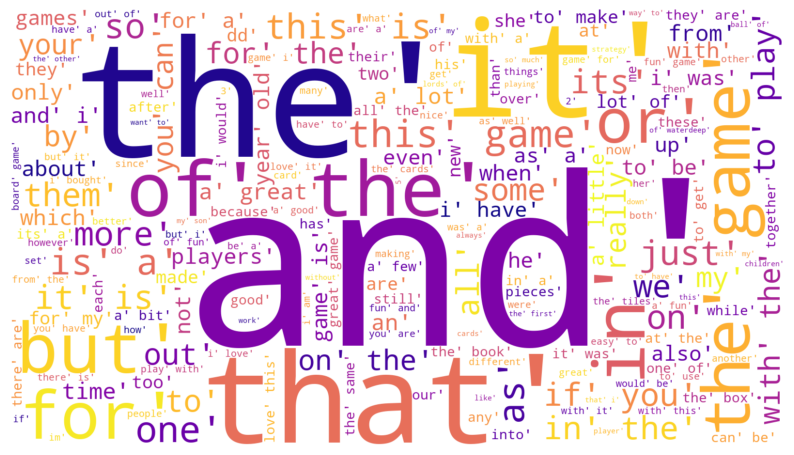

In [23]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Concatenate all the text from the 'text' column
all_summary = ' '.join(copy_df3['summary'].astype(str))

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary)

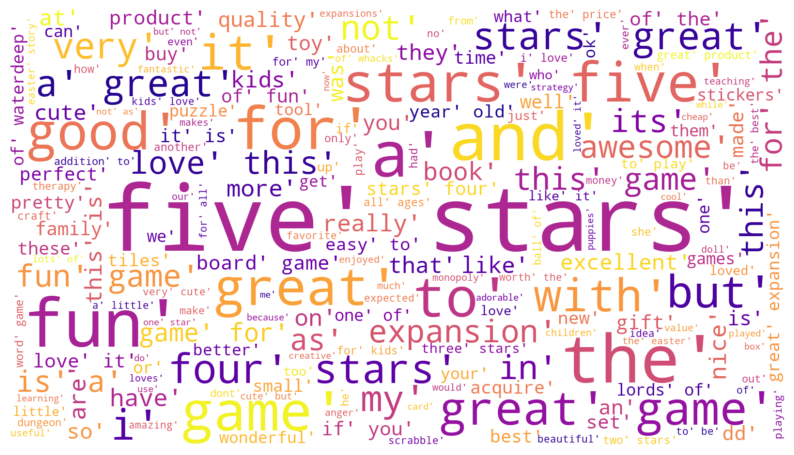

In [25]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [26]:
# Determine the frequency distribution.
# Concatenate all the text from the 'review' column.
all_reviews = ' '.join(copy_df3['review'].astype(str))

# Tokenize the text data.
tokens = nltk.word_tokenize(all_reviews)

# Create a frequency distribution using nltk FreqDist.
freq_dist = FreqDist(tokens)

# Display the frequency distribution.
print(freq_dist)

# Display the 15 most common words
print(freq_dist.most_common(15))

<FreqDist with 7524 samples and 344229 outcomes>
[("'", 118020), (',', 110163), ("'the", 5451), ("'and", 3233), ("'to", 3162), ('a', 3160), ("'of", 2488), ('i', 2090), ("'it", 2083), ('[', 1961), (']', 1961), ("'is", 1782), ("'this", 1776), ("'game", 1671), ("'for", 1545)]


In [27]:
# Determine the frequency distribution.
# Concatenate all the text from the 'review' column.
all_summaries = ' '.join(copy_df3['summary'].astype(str))

# Tokenize the text data.
tokens = nltk.word_tokenize(all_summaries)

# Create a frequency distribution using nltk FreqDist.
freq_dist = FreqDist(tokens)

# Display the frequency distribution.
print(freq_dist)

# Display the 15 most common words
print(freq_dist.most_common(15))

<FreqDist with 1554 samples and 30167 outcomes>
[("'", 9644), (',', 7320), ('[', 1961), (']', 1961), ("'stars", 427), ("'five", 342), ("'game", 319), ("'great", 295), ("'the", 261), ('a', 240), ("'for", 232), ("'fun", 218), ("'to", 192), ("'and", 168), ("'it", 150)]


### 4b) Remove alphanumeric characters and stopwords

In [28]:
# Import the necessary libraries.
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [29]:
# Download the NLTK data.
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alonsoroblescristina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alonsoroblescristina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Delete all the alphanumeric characteres and stopwords from the 'review' and 'summay' columns.
# Create a function to clean the text.

def clean_text(text):
    
    # Combine list elements into a single string
    text = ' '.join(text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove alphanumeric characters and punctuation
    table = str.maketrans('', '', string.punctuation + string.digits)
    tokens = [token.translate(table) for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join the cleaned tokens back into a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the clean_text function to the 'review' and 'summary' columns.
copy_df3['cleaned_review'] = copy_df3['review'].apply(clean_text)
copy_df3['cleaned_summary'] = copy_df3['summary'].apply(clean_text)

# Print the output.
copy_df3.head()

review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                             summary  \
0  [the, fact, that, 50, of, this, space, is, was...   
1  [another, worthless, dungeon, masters, screen,...   
2               [pretty, but, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                      cleaned_review  \
0  comes dms screen space screen absolute premium...   
1  open letter galeforce unpainted miniatures bad...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gfs previous screens completely unneces...   

                                     cleaned_summary  
0  fact  space wasted art terribly informative ne...  
1  another worthless dungeon masters screen galef...  
2                         pretty also pretty useless  
3                                         five stars  
4                                         money trap

### 4c) Create wordcloud without stopwords

In [31]:
# Create a wordcloud without stop words for 'cleaned_review' column.
# Set the colour palette.
sns.set(color_codes=True)

# Concatenate all the text from the 'text' column
all_review = ' '.join(copy_df3['cleaned_review'].astype(str))

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review)

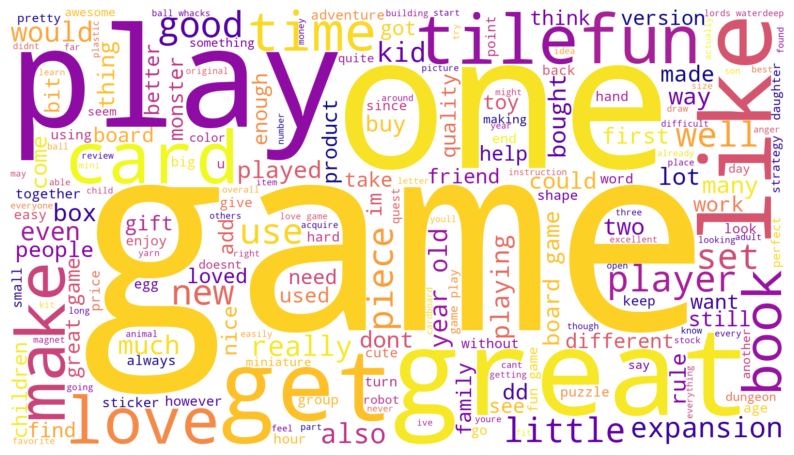

In [32]:
# Plot the wordcloud image for 'cleaned_review' column.
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
# Create a wordcloud without stop words for 'cleaned_summary' column.
# Set the colour palette.
sns.set(color_codes=True)

# Concatenate all the text from the 'text' column
all_summary = ' '.join(copy_df3['cleaned_summary'].astype(str))

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary)

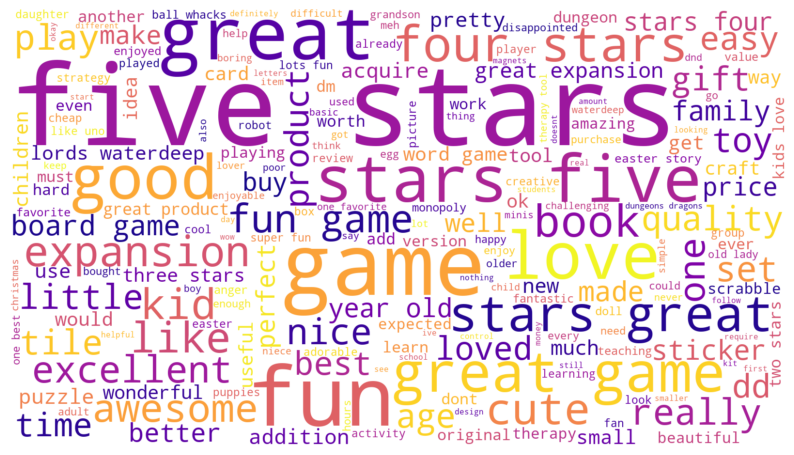

In [34]:
# Plot the wordcloud image for 'cleaned_summary' column.
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4d) Identify 15 most common words and polarity

In [35]:
# Determine the 15 most common words for 'cleaned_review' column.
# Concatenate all the text from the 'cleaned_review' column.
all_reviews = ' '.join(copy_df3['cleaned_review'].astype(str))

# Tokenize the text data.
tokens = nltk.word_tokenize(all_reviews)

# Create a frequency distribution using nltk FreqDist.
freq_dist = FreqDist(tokens)

# Display the frequency distribution.
print(freq_dist)

# Display the 15 most common words
print(freq_dist.most_common(15))

<FreqDist with 7173 samples and 56556 outcomes>
[('game', 1671), ('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273)]


In [36]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens).most_common(15),
                      columns=['Review_Words', 'Frequency']).set_index('Review_Words')

# Preview data.
counts

Frequency
Review_Words           
game               1671
great               580
fun                 552
one                 530
play                502
like                414
love                323
really              319
get                 319
cards               301
tiles               297
time                291
good                289
would               280
book                273

In [37]:
# Determine the 15 most common words for 'cleaned_summary' column.
# Concatenate all the text from the 'cleaned_summary' column.
all_summaries = ' '.join(copy_df3['cleaned_summary'].astype(str))

# Tokenize the text data.
tokens = nltk.word_tokenize(all_summaries)

# Create a frequency distribution using nltk FreqDist.
freq_dist = FreqDist(tokens)

# Display the frequency distribution.
print(freq_dist)

# Display the 15 most common words
print(freq_dist.most_common(15))

<FreqDist with 1414 samples and 6083 outcomes>
[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 92), ('four', 58), ('like', 54), ('expansion', 52), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('awesome', 36)]


In [38]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens).most_common(15),
                      columns=['Summary_Words', 'Frequency']).set_index('Summary_Words')

# Preview data.
counts

Frequency
Summary_Words           
stars                427
five                 342
game                 319
great                295
fun                  218
love                  93
good                  92
four                  58
like                  54
expansion             52
kids                  50
cute                  45
book                  43
one                   38
awesome               36

In [39]:
# Make sure that the needed packages are imported.
import nltk
from nltk.probability import FreqDist
from textblob import TextBlob
import matplotlib.pyplot as plt

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [42]:
# Provided function. Define a function to calculate polarity.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    blob = TextBlob(comment)
    return blob.sentiment.polarity

In [43]:
# Apply the get_polarity function to calculate polarity.
# Calculate polarity for each cleaned_review.
copy_df3['review_polarity'] = copy_df3['cleaned_review'].apply(generate_polarity)
copy_df3.head(15)

review  \
0   [when, it, comes, to, a, dms, screen, the, spa...   
1   [an, open, letter, to, galeforce9, your, unpai...   
2   [nice, art, nice, printing, why, two, panels, ...   
3   [amazing, buy, bought, it, as, a, gift, for, o...   
4   [as, my, review, of, gf9s, previous, screens, ...   
5                                   [grandson, loves]   
6   [i, have, bought, many, gm, screens, over, the...   
7                      [came, in, perfect, condition]   
8   [could, be, better, but, its, still, great, i,...   
9   [my, review, will, mirror, others, in, that, t...   
10                                [works, very, well]   
11                          [cant, wait, to, use, it]   
12  [this, is, a, campaign, specific, dm, screen, ...   
13  [this, is, one, of, the, worst, games, i, have...   
14  [it, sounded, like, a, really, amazing, concep...   

                                              summary  \
0   [the, fact, that, 50, of, this, space, is, was...   
1   [another, worthless, dungeon, masters, screen,...   
2                [pretty, but, also, pretty, useless]   
3                                       [five, stars]   
4                                       [money, trap]   
5                                       [five, stars]   
6                            [best, gm, screen, ever]   
7                                       [five, stars]   
8               [great, but, could, be, even, better]   
9   [another, missed, opportunity, not, a, value, ...   
10                                      [five, stars]   
11                                   [love, the, map]   
12                      [not, a, general, dm, screen]   
13                                 [very, weak, game]   
14                           [fell, completely, flat]   

                                       cleaned_review  \
0   comes dms screen space screen absolute premium...   
1   open letter galeforce unpainted miniatures bad...   
2   nice art nice printing two panels filled gener...   
3              amazing buy bought gift new dm perfect   
4   review gfs previous screens completely unneces...   
5                                      grandson loves   
6   bought many gm screens years one best ever see...   
7                              came perfect condition   
8   could better still great love things dms side ...   
9   review mirror others kind misses mark lost opp...   
10                                         works well   
11                                      cant wait use   
12  campaign specific dm screen meant work storm k...   
13  one worst games ever played basically come pun...   
14  sounded like really amazing concept tried play...   

                                      cleaned_summary  polarity  \
0   fact  space wasted art terribly informative ne...   -0.6000   
1   another worthless dungeon masters screen galef...   -0.8000   
2                          pretty also pretty useless    0.0000   
3                                          five stars    0.0000   
4                                          money trap    0.0000   
5                                          five stars    0.0000   
6                                 best gm screen ever    1.0000   
7                                          five stars    0.0000   
8                             great could even better    0.6500   
9   another missed opportunity value add product line    0.0000   
10                                         five stars    0.0000   
11                                           love map    0.5000   
12                                  general dm screen    0.0500   
13                                          weak game   -0.3875   
14                               fell completely flat   -0.0250   

    review_polarity  
0         -0.242857  
1         -0.019468  
2          0.118243  
3          0.578788  
4         -0.316667  
5          0.000000  
6          0.380000  
7          1.000000  
8          0.372222  
9          0.12

In [44]:
# Calculate polarity for each cleaned_summary.
copy_df3['summary_polarity'] = copy_df3['cleaned_summary'].apply(generate_polarity)
copy_df3.head(15)

review  \
0   [when, it, comes, to, a, dms, screen, the, spa...   
1   [an, open, letter, to, galeforce9, your, unpai...   
2   [nice, art, nice, printing, why, two, panels, ...   
3   [amazing, buy, bought, it, as, a, gift, for, o...   
4   [as, my, review, of, gf9s, previous, screens, ...   
5                                   [grandson, loves]   
6   [i, have, bought, many, gm, screens, over, the...   
7                      [came, in, perfect, condition]   
8   [could, be, better, but, its, still, great, i,...   
9   [my, review, will, mirror, others, in, that, t...   
10                                [works, very, well]   
11                          [cant, wait, to, use, it]   
12  [this, is, a, campaign, specific, dm, screen, ...   
13  [this, is, one, of, the, worst, games, i, have...   
14  [it, sounded, like, a, really, amazing, concep...   

                                              summary  \
0   [the, fact, that, 50, of, this, space, is, was...   
1   [another, worthless, dungeon, masters, screen,...   
2                [pretty, but, also, pretty, useless]   
3                                       [five, stars]   
4                                       [money, trap]   
5                                       [five, stars]   
6                            [best, gm, screen, ever]   
7                                       [five, stars]   
8               [great, but, could, be, even, better]   
9   [another, missed, opportunity, not, a, value, ...   
10                                      [five, stars]   
11                                   [love, the, map]   
12                      [not, a, general, dm, screen]   
13                                 [very, weak, game]   
14                           [fell, completely, flat]   

                                       cleaned_review  \
0   comes dms screen space screen absolute premium...   
1   open letter galeforce unpainted miniatures bad...   
2   nice art nice printing two panels filled gener...   
3              amazing buy bought gift new dm perfect   
4   review gfs previous screens completely unneces...   
5                                      grandson loves   
6   bought many gm screens years one best ever see...   
7                              came perfect condition   
8   could better still great love things dms side ...   
9   review mirror others kind misses mark lost opp...   
10                                         works well   
11                                      cant wait use   
12  campaign specific dm screen meant work storm k...   
13  one worst games ever played basically come pun...   
14  sounded like really amazing concept tried play...   

                                      cleaned_summary  polarity  \
0   fact  space wasted art terribly informative ne...   -0.6000   
1   another worthless dungeon masters screen galef...   -0.8000   
2                          pretty also pretty useless    0.0000   
3                                          five stars    0.0000   
4                                          money trap    0.0000   
5                                          five stars    0.0000   
6                                 best gm screen ever    1.0000   
7                                          five stars    0.0000   
8                             great could even better    0.6500   
9   another missed opportunity value add product line    0.0000   
10                                         five stars    0.0000   
11                                           love map    0.5000   
12                                  general dm screen    0.0500   
13                                          weak game   -0.3875   
14                               fell completely flat   -0.0250   

    review_polarity  summary_polarity  
0         -0.242857           -0.6000  
1         -0.019468           -0.8000  
2          0.118243            0.0000  
3          0.578788            0.0000  
4         -0.316667            0.00

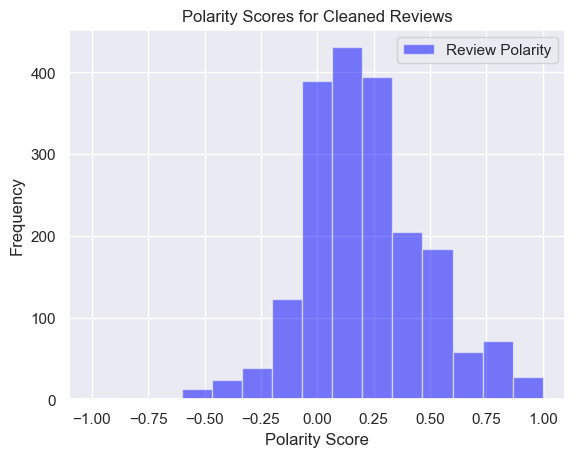

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [45]:
# Plot histograms of polarity scores for 'cleaned_review'
plt.hist(copy_df3['review_polarity'], bins=15, alpha=0.5, color='blue', label='Review Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Polarity Scores for Cleaned Reviews')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6)) 

In [46]:
# Convert polarity scores to sentiment scores

# Convert polarity scores to sentiment scores
copy_df3['sentiment'] = copy_df3['review_polarity'].apply(lambda score: 
                                                          'Positive' if score > 0 else 'Neutral' 
                                                          if score == 0 else 'Negative')
copy_df3.head(15)

review  \
0   [when, it, comes, to, a, dms, screen, the, spa...   
1   [an, open, letter, to, galeforce9, your, unpai...   
2   [nice, art, nice, printing, why, two, panels, ...   
3   [amazing, buy, bought, it, as, a, gift, for, o...   
4   [as, my, review, of, gf9s, previous, screens, ...   
5                                   [grandson, loves]   
6   [i, have, bought, many, gm, screens, over, the...   
7                      [came, in, perfect, condition]   
8   [could, be, better, but, its, still, great, i,...   
9   [my, review, will, mirror, others, in, that, t...   
10                                [works, very, well]   
11                          [cant, wait, to, use, it]   
12  [this, is, a, campaign, specific, dm, screen, ...   
13  [this, is, one, of, the, worst, games, i, have...   
14  [it, sounded, like, a, really, amazing, concep...   

                                              summary  \
0   [the, fact, that, 50, of, this, space, is, was...   
1   [another, worthless, dungeon, masters, screen,...   
2                [pretty, but, also, pretty, useless]   
3                                       [five, stars]   
4                                       [money, trap]   
5                                       [five, stars]   
6                            [best, gm, screen, ever]   
7                                       [five, stars]   
8               [great, but, could, be, even, better]   
9   [another, missed, opportunity, not, a, value, ...   
10                                      [five, stars]   
11                                   [love, the, map]   
12                      [not, a, general, dm, screen]   
13                                 [very, weak, game]   
14                           [fell, completely, flat]   

                                       cleaned_review  \
0   comes dms screen space screen absolute premium...   
1   open letter galeforce unpainted miniatures bad...   
2   nice art nice printing two panels filled gener...   
3              amazing buy bought gift new dm perfect   
4   review gfs previous screens completely unneces...   
5                                      grandson loves   
6   bought many gm screens years one best ever see...   
7                              came perfect condition   
8   could better still great love things dms side ...   
9   review mirror others kind misses mark lost opp...   
10                                         works well   
11                                      cant wait use   
12  campaign specific dm screen meant work storm k...   
13  one worst games ever played basically come pun...   
14  sounded like really amazing concept tried play...   

                                      cleaned_summary  polarity  \
0   fact  space wasted art terribly informative ne...   -0.6000   
1   another worthless dungeon masters screen galef...   -0.8000   
2                          pretty also pretty useless    0.0000   
3                                          five stars    0.0000   
4                                          money trap    0.0000   
5                                          five stars    0.0000   
6                                 best gm screen ever    1.0000   
7                                          five stars    0.0000   
8                             great could even better    0.6500   
9   another missed opportunity value add product line    0.0000   
10                                         five stars    0.0000   
11                                           love map    0.5000   
12                                  general dm screen    0.0500   
13                                          weak game   -0.3875   
14                               fell completely flat   -0.0250   

    review_polarity  summary_polarity sentiment  
0         -0.242857           -0.6000  Negative  
1         -0.019468           -0.8000  Negative  
2          0.118243            0.0000  Positive  
3          0.578788            0.00

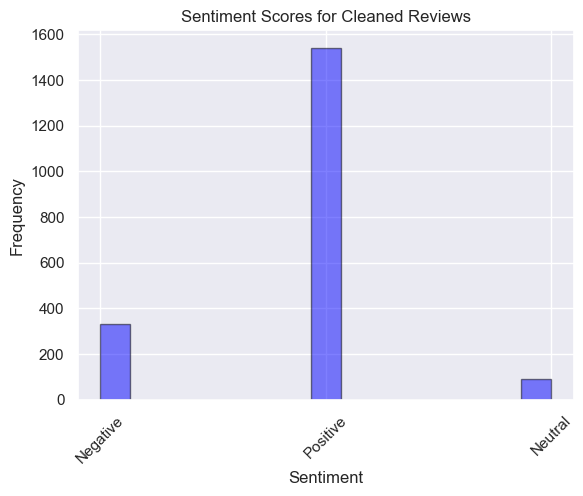

In [47]:
# Plot a histogram of sentiment scores.
plt.hist(copy_df3['sentiment'], bins=15, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Scores for Cleaned Reviews')
plt.xticks(rotation=45)
plt.show()

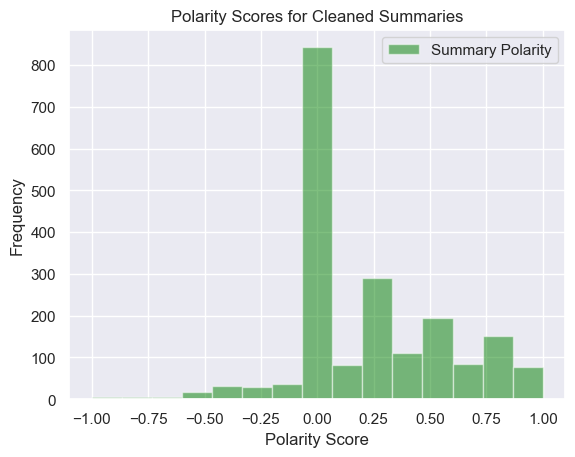

In [48]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity.
# Plot histograms of polarity scores for 'cleaned_summary'
plt.hist(copy_df3['summary_polarity'], bins=15, alpha=0.5, color='green', label='Summary Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Polarity Scores for Cleaned Summaries')
plt.legend()
plt.show()

In [49]:
# Convert polarity scores to sentiment scores
copy_df3['sentiment'] = copy_df3['summary_polarity'].apply(lambda score: 
                                                          'Positive' if score > 0 else 'Neutral' 
                                                          if score == 0 else 'Negative')
copy_df3.head(15)

review  \
0   [when, it, comes, to, a, dms, screen, the, spa...   
1   [an, open, letter, to, galeforce9, your, unpai...   
2   [nice, art, nice, printing, why, two, panels, ...   
3   [amazing, buy, bought, it, as, a, gift, for, o...   
4   [as, my, review, of, gf9s, previous, screens, ...   
5                                   [grandson, loves]   
6   [i, have, bought, many, gm, screens, over, the...   
7                      [came, in, perfect, condition]   
8   [could, be, better, but, its, still, great, i,...   
9   [my, review, will, mirror, others, in, that, t...   
10                                [works, very, well]   
11                          [cant, wait, to, use, it]   
12  [this, is, a, campaign, specific, dm, screen, ...   
13  [this, is, one, of, the, worst, games, i, have...   
14  [it, sounded, like, a, really, amazing, concep...   

                                              summary  \
0   [the, fact, that, 50, of, this, space, is, was...   
1   [another, worthless, dungeon, masters, screen,...   
2                [pretty, but, also, pretty, useless]   
3                                       [five, stars]   
4                                       [money, trap]   
5                                       [five, stars]   
6                            [best, gm, screen, ever]   
7                                       [five, stars]   
8               [great, but, could, be, even, better]   
9   [another, missed, opportunity, not, a, value, ...   
10                                      [five, stars]   
11                                   [love, the, map]   
12                      [not, a, general, dm, screen]   
13                                 [very, weak, game]   
14                           [fell, completely, flat]   

                                       cleaned_review  \
0   comes dms screen space screen absolute premium...   
1   open letter galeforce unpainted miniatures bad...   
2   nice art nice printing two panels filled gener...   
3              amazing buy bought gift new dm perfect   
4   review gfs previous screens completely unneces...   
5                                      grandson loves   
6   bought many gm screens years one best ever see...   
7                              came perfect condition   
8   could better still great love things dms side ...   
9   review mirror others kind misses mark lost opp...   
10                                         works well   
11                                      cant wait use   
12  campaign specific dm screen meant work storm k...   
13  one worst games ever played basically come pun...   
14  sounded like really amazing concept tried play...   

                                      cleaned_summary  polarity  \
0   fact  space wasted art terribly informative ne...   -0.6000   
1   another worthless dungeon masters screen galef...   -0.8000   
2                          pretty also pretty useless    0.0000   
3                                          five stars    0.0000   
4                                          money trap    0.0000   
5                                          five stars    0.0000   
6                                 best gm screen ever    1.0000   
7                                          five stars    0.0000   
8                             great could even better    0.6500   
9   another missed opportunity value add product line    0.0000   
10                                         five stars    0.0000   
11                                           love map    0.5000   
12                                  general dm screen    0.0500   
13                                          weak game   -0.3875   
14                               fell completely flat   -0.0250   

    review_polarity  summary_polarity sentiment  
0         -0.242857           -0.6000  Negative  
1         -0.019468           -0.8000  Negative  
2          0.118243            0.0000   Neutral  
3          0.578788            0.00

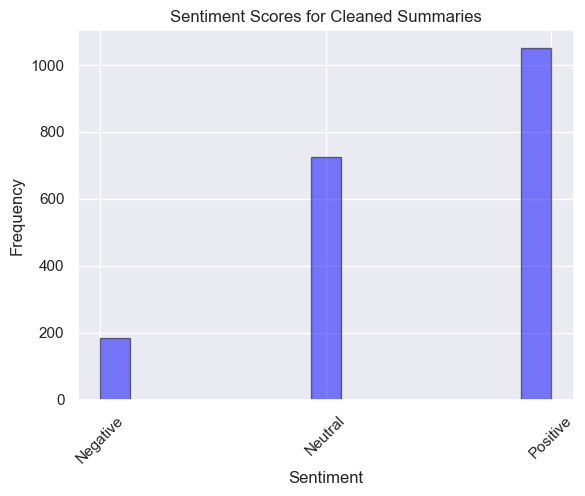

In [50]:
# Plot a histogram of sentiment scores.
plt.hist(copy_df3['sentiment'], bins=15, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Scores for Cleaned Summaries')
plt.xticks(rotation=45)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [51]:
# Sort the DataFrame by polarity scores in descending order.
sorted_copy_df3 = copy_df3.sort_values(by='polarity', ascending=False)

# Top 20 negative reviews.
top_negative_reviews = sorted_copy_df3.tail(20)['cleaned_review'].tolist()

# View output.
top_negative_reviews

['im sorry find product boring frank juvenile',
 'comes dms screen space screen absolute premium fact  space wasted art terribly informative needed art well makes completely useless reason gave  stars  technically speaking least still stand block notes dice rolls drops ball completely',
 'really cheaply produced cardboard playing pieces cost',
 'high hopes game big fan fourth edition dd though like e enjoy im going tell one better ill tell one prefer also enjoy games modular tiles really went game biased towards enjoying sadly couldnt rescue game exceedingly repetitive play  turns youll get entire experience game offer nothing new exciting game hopelessly shallow based much chance strategy nonexistent despite modular tiles game offers virtually customization pieces seem wellmade fortunately might supply use actual dd since store bought doesnt returns however quality pieces matched game really wanted enjoy game played  whole games uncounted number aborted attempts accepting fact simply 

In [52]:
# Top 20 negative summaries.
top_negative_summaries = sorted_copy_df3.tail(20)['cleaned_summary'].tolist()

# View output.
top_negative_summaries

['disappointing',
 'fact  space wasted art terribly informative needed art',
 'disappointing',
 'disappointing',
 'disappointing',
 'small boring',
 'mad dragon',
 'bad qualityall made paper',
 'bad expecting',
 'promotes anger instead teaching calming methods',
 'disappointed',
 'disappointed',
 'disappointed',
 'disappointed',
 'another worthless dungeon masters screen galeforce',
 'hated running rpg campaign dealing towns',
 'boring',
 'horrible nothing say would give zero stars',
 'boring unless craft person',
 'worst value ive ever seen']

In [53]:
# Top 20 positive reviews.
# Get the top 20 positive reviews.
top_positive_reviews = sorted_copy_df3.head(20)['cleaned_review'].tolist()

# View output.
top_positive_reviews

['make game come alive battles go much quickly smoothly nicely designed great way give detail depth battles',
 'excellent expansion lords waterdeep importantly adds sixth player option game',
 'pigeon books elementary school library dont pigeon missing students love pigeon',
 'disclaimer one villain cards came factory defect machine burned rarity far rest best miniatures ive ever cave bears wifes favorite love otyugh insane number orcs duergar extra kobolds devils frickin awesome seriously well balanced even new game features stand even better previous castle ravenloft game',
 'bought doll  year old boy class preschool teacher perfect children love animals separately also book trio last years always favorite hands story preschoolers used one previous school belonged school time bought set',
 'impressed quality puzzle easy fun put together',
 'great resource bhis care coordinators works well kids teens says',
 'opinion best dungeon crawler setup played tore  hours makes fun ride fun kid

In [54]:
# Top 20 positive summaries.
top_positive_summaries = sorted_copy_df3.head(20)['cleaned_summary'].tolist()

# View output.
top_positive_summaries

['awesome',
 'adds six player option excellent expansion',
 'pigeon perfect addition school library',
 'best boardgame ever',
 'perfect preschoolers',
 'excellent puzzle',
 'perfect',
 'best dungeon crawler',
 'wonderful ball manipulate',
 'awesome expansion',
 'awesome',
 'theyre perfect size keep car diaper',
 'best one series',
 'excellent',
 'perfect gift',
 'wonderful',
 'one best games ever',
 'best among dd boardgames',
 'awesome seller thank',
 'one best games ever']

# 